In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/dsf_data

/content/drive/MyDrive/dsf_data


In [ ]:
import pandas as pd
df_lax=pd.read_csv('Detailed_Statistics_Departures_LAX.csv')
df_jfk=pd.read_csv('Detailed_Statistics_Departures_JFK.csv')
df_ord=pd.read_csv('Detailed_Statistics_Departures_ORD.csv')
df_dfw=pd.read_csv('Detailed_Statistics_Departures_DFW.csv')

In [ ]:
df_lax.head(10)
#type(df_lax['Scheduled departure time'][0])

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,1/1/2012,2.0,N339AA,JFK,9:30,9:27,330.0,318.0,-3.0,9:45,18.0,0.0,0.0,0.0,0.0,0.0
1,AA,1/1/2012,4.0,N321AA,JFK,12:15,12:16,330.0,323.0,1.0,12:29,13.0,0.0,0.0,0.0,0.0,0.0
2,AA,1/1/2012,10.0,N327AA,JFK,21:20,21:18,310.0,307.0,-2.0,21:33,15.0,0.0,0.0,0.0,0.0,0.0
3,AA,1/1/2012,22.0,N329AA,JFK,15:00,15:01,315.0,320.0,1.0,15:15,14.0,0.0,0.0,0.0,0.0,0.0
4,AA,1/1/2012,30.0,N339AA,JFK,23:40,0:58,319.0,303.0,78.0,1:14,16.0,62.0,0.0,0.0,0.0,0.0
5,AA,1/1/2012,31.0,N5ECAA,HNL,7:55,7:51,360.0,342.0,-4.0,8:07,16.0,0.0,0.0,0.0,0.0,0.0
6,AA,1/1/2012,32.0,N325AA,JFK,13:45,13:40,320.0,337.0,-5.0,13:55,15.0,0.0,0.0,0.0,0.0,0.0
7,AA,1/1/2012,34.0,N335AA,JFK,8:05,8:07,325.0,317.0,2.0,8:23,16.0,0.0,0.0,0.0,0.0,0.0
8,AA,1/1/2012,40.0,N319AA,JFK,11:05,11:07,330.0,316.0,2.0,11:25,18.0,0.0,0.0,0.0,0.0,0.0
9,AA,1/1/2012,74.0,N3DVAA,IAD,23:00,22:54,280.0,281.0,-6.0,23:13,19.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df=df_lax
df['Date (MM/DD/YYYY)'] = pd.to_datetime(df['Date (MM/DD/YYYY)'], format='%m/%d/%Y', errors='coerce')

# Count the number of rows before deletion
rows_before = len(df)

# Filter DataFrame to keep only valid dates
df = df.dropna(subset=['Date (MM/DD/YYYY)'])

# Count the number of rows after deletion
rows_after = len(df)

# Output the number of rows deleted
rows_deleted = rows_before - rows_after
print(f"Number of rows deleted: {rows_deleted}")

Number of rows deleted: 2


In [ ]:
df=df_jfk
df['Date (MM/DD/YYYY)'] = pd.to_datetime(df['Date (MM/DD/YYYY)'], format='%m/%d/%Y', errors='coerce')

# Count the number of rows before deletion
rows_before = len(df)

# Filter DataFrame to keep only valid dates
df = df.dropna(subset=['Date (MM/DD/YYYY)'])

# Count the number of rows after deletion
rows_after = len(df)

# Output the number of rows deleted
rows_deleted = rows_before - rows_after
print(f"Number of rows deleted: {rows_deleted}")

Number of rows deleted: 2


In [ ]:
df=df_ord
df['Date (MM/DD/YYYY)'] = pd.to_datetime(df['Date (MM/DD/YYYY)'], format='%m/%d/%Y', errors='coerce')

# Count the number of rows before deletion
rows_before = len(df)

# Filter DataFrame to keep only valid dates
df = df.dropna(subset=['Date (MM/DD/YYYY)'])

# Count the number of rows after deletion
rows_after = len(df)

# Output the number of rows deleted
rows_deleted = rows_before - rows_after
print(f"Number of rows deleted: {rows_deleted}")

Number of rows deleted: 2


In [ ]:
df=df_dfw
df['Date (MM/DD/YYYY)'] = pd.to_datetime(df['Date (MM/DD/YYYY)'], format='%m/%d/%Y', errors='coerce')

# Count the number of rows before deletion
rows_before = len(df)

# Filter DataFrame to keep only valid dates
df = df.dropna(subset=['Date (MM/DD/YYYY)'])

# Count the number of rows after deletion
rows_after = len(df)

# Output the number of rows deleted
rows_deleted = rows_before - rows_after
print(f"Number of rows deleted: {rows_deleted}")

Number of rows deleted: 0


In [ ]:
import pytz
import time
# Function to handle daylight saving time
dst_start_month = 3  # March
dst_end_month = 11   # November
def handle_dst(dt,timezone_var):
  time_tz = pytz.timezone(timezone_var)
  if dst_start_month <= dt.month <= dst_end_month:
      # Daylight Saving Time
      return time_tz.localize(dt, is_dst=True)
  else:
      # Standard Time
      return time_tz.localize(dt, is_dst=False)

def convert_time_to_utc(df,timezone):
  df['Actual departure time']=pd.to_datetime(df['Actual departure time'], format='%H:%M', errors='coerce')
  df['Scheduled departure time']=pd.to_datetime(df['Scheduled departure time'], format='%H:%M', errors='coerce')
  df['Date (MM/DD/YYYY)'] = pd.to_datetime(df['Date (MM/DD/YYYY)'], format='%m/%d/%Y', errors='coerce')
  df = df.dropna(subset=['Date (MM/DD/YYYY)'])
  timezone_var='America/'+timezone
  time_tz=pytz.timezone(timezone_var)
  #df['Actual departure time']=df['Actual departure time'].dt.tz_localize()
  #df['Scheduled departure time']=df['Scheduled departure time']
  #df['Date (MM/DD/YYYY)'] = pd.to_datetime(df['Date (MM/DD/YYYY)'], format='%m/%d/%Y')
  #print(type(df['Date (MM/DD/YYYY)'][0]))
  #print(type(df['Actual departure time'][0]))
  df['Date (MM/DD/YYYY)'] = df['Date (MM/DD/YYYY)'].dt.strftime('%m/%d/%Y')
  df['Actual departure time'] = df['Actual departure time'].dt.strftime('%H:%M:%S')
  df['Scheduled departure time'] = df['Scheduled departure time'].dt.strftime('%H:%M:%S')
  #print(type(df['Date (MM/DD/YYYY)'][0]))
  #print(type(df['Actual departure time'][0]))
  df['Actual departure datetime']=pd.to_datetime(df['Date (MM/DD/YYYY)']+' '+df['Actual departure time'])
  df['Scheduled departure datetime']=pd.to_datetime(df['Date (MM/DD/YYYY)'] + ' ' + df['Scheduled departure time'])
  #time.sleep(5)
  # Apply the function to the datetime column
  print(df.columns)
  df['Actual departure datetime'] = df['Actual departure datetime'].apply(lambda dt: handle_dst(dt, timezone_var) if pd.notnull(dt) else None)
  df['Scheduled departure datetime'] = df['Scheduled departure datetime'].apply(lambda dt: handle_dst(dt,timezone_var) if pd.notnull(dt) else None)
  print(df.head())
  # Convert to UTC or other desired timezone

  df['Actual departure datetime'] = df['Actual departure datetime'].dt.tz_convert('UTC')
  df['Scheduled departure datetime'] = df['Scheduled departure datetime'].dt.tz_convert('UTC')
  print(df.head())
  return df
  #df['Actual departure datetime'] = df['Actual departure datetime'].dt.tz_convert('UTC')
  #return df
  #df['Actual departure datetime']=df['Actual departure datetime'].dt.tz_localize(time_tz, ambiguous='infer').dt.tz_convert('UTC')
  #df['Scheduled departure datetime']=df['Scheduled departure datetime'].dt.tz_localize(time_tz, ambiguous='infer').dt.tz_convert('UTC')

  '''
  df['datetime_column_utc'] = df['datetime_column_ny'].dt.tz_localize(ny_tz, ambiguous='infer').dt.tz_convert('UTC')
df['datetime_column'] = pd.to_datetime(df['date_column'] + ' ' + df['time_column'])

# New York (Eastern Time)
ny_tz = pytz.timezone('America/New_York')
df['datetime_column_ny'] = df['datetime_column'].dt.tz_localize(pytz.utc).dt.tz_convert(ny_tz)
'''

In [ ]:
pd.set_option('mode.chained_assignment', None)
df_lax=convert_time_to_utc(df_lax,'Los_Angeles')
df_lax.to_csv('Utc_lax')

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Actual departure datetime', 'Scheduled departure datetime'],
      dtype='object')
  Carrier Code Date (MM/DD/YYYY)  Flight Number Tail Number  \
0           AA        01/01/2012            2.0      N339AA   
1           AA        01/01/2012            4.0      N321AA   
2           AA        01/01/2012           10.0      N327AA   
3           AA        01/01/2012           22.0      N329AA   
4           AA        01/01/2012           30.0      N339AA   

  Destination Airport Sch

In [ ]:
df_dfw=convert_time_to_utc(df_dfw,'Chicago')
df_jfk=convert_time_to_utc(df_jfk,'New_York')
df_ord=convert_time_to_utc(df_ord,'Chicago')
df_dfw.to_csv('Utc_dfw')
df_jfk.to_csv('Utc_jfk')
df_ord.to_csv('Utc_ord')

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Actual departure datetime', 'Scheduled departure datetime'],
      dtype='object')
  Carrier Code Date (MM/DD/YYYY)  Flight Number Tail Number  \
0           AA        01/01/2012              5      N359AA   
1           AA        01/01/2012              7      N392AA   
2           AA        01/01/2012            123      N376AA   
3           AA        01/01/2012            304      N4XKAA   
4           AA        01/01/2012            310      N540AA   

  Destination Airport Sch

<ipython-input-29-f038d46c101e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date (MM/DD/YYYY)'] = df['Date (MM/DD/YYYY)'].dt.strftime('%m/%d/%Y')
<ipython-input-29-f038d46c101e>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Actual departure time'] = df['Actual departure time'].dt.strftime('%H:%M:%S')
<ipython-input-29-f038d46c101e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Actual departure datetime', 'Scheduled departure datetime'],
      dtype='object')


<ipython-input-29-f038d46c101e>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Actual departure datetime'] = df['Actual departure datetime'].apply(lambda dt: handle_dst(dt, timezone_var) if pd.notnull(dt) else None)
<ipython-input-29-f038d46c101e>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Scheduled departure datetime'] = df['Scheduled departure datetime'].apply(lambda dt: handle_dst(dt,timezone_var) if pd.notnull(dt) else None)
<ipython-input-29-f038d46c101e>:42: SettingWithCopyWarning: 


  Carrier Code Date (MM/DD/YYYY)  Flight Number Tail Number  \
0           AA        01/01/2012            1.0      N325AA   
1           AA        01/01/2012            3.0      N328AA   
2           AA        01/01/2012           19.0      N329AA   
3           AA        01/01/2012           21.0      N339AA   
4           AA        01/01/2012           33.0      N321AA   

  Destination Airport Scheduled departure time Actual departure time  \
0                 LAX                 09:00:00              08:55:00   
1                 LAX                 12:00:00              11:53:00   
2                 LAX                 10:30:00              10:25:00   
3                 LAX                 19:10:00              19:15:00   
4                 LAX                 07:40:00              07:39:00   

   Scheduled elapsed time (Minutes)  Actual elapsed time (Minutes)  \
0                             385.0                          347.0   
1                             375.0             

<ipython-input-29-f038d46c101e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date (MM/DD/YYYY)'] = df['Date (MM/DD/YYYY)'].dt.strftime('%m/%d/%Y')
<ipython-input-29-f038d46c101e>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Actual departure time'] = df['Actual departure time'].dt.strftime('%H:%M:%S')
<ipython-input-29-f038d46c101e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Actual departure datetime', 'Scheduled departure datetime'],
      dtype='object')


<ipython-input-29-f038d46c101e>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Actual departure datetime'] = df['Actual departure datetime'].apply(lambda dt: handle_dst(dt, timezone_var) if pd.notnull(dt) else None)
<ipython-input-29-f038d46c101e>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Scheduled departure datetime'] = df['Scheduled departure datetime'].apply(lambda dt: handle_dst(dt,timezone_var) if pd.notnull(dt) else None)
<ipython-input-29-f038d46c101e>:42: SettingWithCopyWarning: 


  Carrier Code Date (MM/DD/YYYY)  Flight Number Tail Number  \
0           AA        01/01/2012           73.0      N356AA   
1           AA        01/01/2012          154.0      N3EUAA   
2           AA        01/01/2012          294.0      N627AA   
3           AA        01/01/2012          309.0      N202AA   
4           AA        01/01/2012          335.0      N543AA   

  Destination Airport Scheduled departure time Actual departure time  \
0                 HNL                 11:10:00              11:28:00   
1                 BOS                 17:40:00              17:46:00   
2                 MIA                 09:35:00              09:47:00   
3                 MCO                 11:10:00              11:05:00   
4                 AUS                 17:45:00              17:40:00   

   Scheduled elapsed time (Minutes)  Actual elapsed time (Minutes)  \
0                             565.0                          542.0   
1                             130.0             

In [ ]:
df_lax.head(5)

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Actual departure datetime,Scheduled departure datetime
0,AA,01/01/2012,2.0,N339AA,JFK,09:30:00,09:27:00,330.0,318.0,-3.0,9:45,18.0,0.0,0.0,0.0,0.0,0.0,2012-01-01 17:27:00+00:00,2012-01-01 17:30:00+00:00
1,AA,01/01/2012,4.0,N321AA,JFK,12:15:00,12:16:00,330.0,323.0,1.0,12:29,13.0,0.0,0.0,0.0,0.0,0.0,2012-01-01 20:16:00+00:00,2012-01-01 20:15:00+00:00
2,AA,01/01/2012,10.0,N327AA,JFK,21:20:00,21:18:00,310.0,307.0,-2.0,21:33,15.0,0.0,0.0,0.0,0.0,0.0,2012-01-02 05:18:00+00:00,2012-01-02 05:20:00+00:00
3,AA,01/01/2012,22.0,N329AA,JFK,15:00:00,15:01:00,315.0,320.0,1.0,15:15,14.0,0.0,0.0,0.0,0.0,0.0,2012-01-01 23:01:00+00:00,2012-01-01 23:00:00+00:00
4,AA,01/01/2012,30.0,N339AA,JFK,23:40:00,00:58:00,319.0,303.0,78.0,1:14,16.0,62.0,0.0,0.0,0.0,0.0,2012-01-01 08:58:00+00:00,2012-01-02 07:40:00+00:00


In [ ]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
list_of_airports=['lax','jfk','ord','dfw']
dict_of_df={}
list_of_timezones=['Los_Angeles','New_York','Chicago','Chicago']
#for i in range(len(list_of_airports)):
df_names = [f'df_{item}' for item in list_of_airports]
df_dict = {name: globals()[name] for name in df_names}
#print(df_dict)
count=0
for key in df_dict.keys():
  convert_time_to_utc(df_dict[key],list_of_timezones[count])
  print("df number is done: " ,count)
  print(df_dict[key].columns)
  count=count+1

df number is done:  0
df number is done:  1
df number is done:  2
df number is done:  3


In [ ]:
df_lax.to_csv('LAX_.csv')
df_jfk.to_csv('JFK_.csv')
df_dfw.to_csv('DFW_.csv')
df_ord.to_csv('ORD_.csv')

In [ ]:
import pandas as pd
df_lax_utc=pd.read_csv('Utc_lax')
df_jfk_utc=pd.read_csv('Utc_jfk')
df_ord_utc=pd.read_csv('Utc_ord')
df_dfw_utc=pd.read_csv('Utc_dfw')

In [ ]:
weather_lax=pd.read_csv('LAX.csv')
weather_jfk=pd.read_csv('JFK.csv')
weather_ord=pd.read_csv('ORD.csv')
weather_dfw=pd.read_csv('DFW.csv')

<ipython-input-50-8a897fa42cf2>:1: DtypeWarning: Columns (2,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_lax=pd.read_csv('LAX.csv')
<ipython-input-50-8a897fa42cf2>:2: DtypeWarning: Columns (2,3,4,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_jfk=pd.read_csv('JFK.csv')
<ipython-input-50-8a897fa42cf2>:3: DtypeWarning: Columns (2,3,4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_ord=pd.read_csv('ORD.csv')
<ipython-input-50-8a897fa42cf2>:4: DtypeWarning: Columns (2,3,4,8,10,27) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_dfw=pd.read_csv('DFW.csv')


In [ ]:
#type(df_lax_utc['Scheduled departure datetime'][0])

str

In [ ]:
#df_lax_utc.head(5)

,Unnamed: 0,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Actual departure datetime,Scheduled departure datetime
0,0,AA,01/01/2012,2.0,N339AA,JFK,09:30:00,09:27:00,330.0,318.0,-3.0,9:45,18.0,0.0,0.0,0.0,0.0,0.0,2012-01-01 17:27:00+00:00,2012-01-01 17:30:00+00:00
1,1,AA,01/01/2012,4.0,N321AA,JFK,12:15:00,12:16:00,330.0,323.0,1.0,12:29,13.0,0.0,0.0,0.0,0.0,0.0,2012-01-01 20:16:00+00:00,2012-01-01 20:15:00+00:00
2,2,AA,01/01/2012,10.0,N327AA,JFK,21:20:00,21:18:00,310.0,307.0,-2.0,21:33,15.0,0.0,0.0,0.0,0.0,0.0,2012-01-02 05:18:00+00:00,2012-01-02 05:20:00+00:00
3,3,AA,01/01/2012,22.0,N329AA,JFK,15:00:00,15:01:00,315.0,320.0,1.0,15:15,14.0,0.0,0.0,0.0,0.0,0.0,2012-01-01 23:01:00+00:00,2012-01-01 23:00:00+00:00
4,4,AA,01/01/2012,30.0,N339AA,JFK,23:40:00,00:58:00,319.0,303.0,78.0,1:14,16.0,62.0,0.0,0.0,0.0,0.0,2012-01-01 08:58:00+00:00,2012-01-02 07:40:00+00:00


In [ ]:
#df_lax_utc.columns

Index(['Unnamed: 0', 'Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number',
       'Tail Number', 'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Actual departure datetime', 'Scheduled departure datetime'],
      dtype='object')

In [ ]:
#df_lax_utc.sort_values('Scheduled departure datetime')

,Unnamed: 0,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Actual departure datetime,Scheduled departure datetime
56,56,AA,01/01/2012,2400.0,N3FAAA,DFW,00:20:00,00:17:00,165.0,177.0,-3.0,0:39,22.0,0.0,0.0,0.0,0.0,0.0,2012-01-01 08:17:00+00:00,2012-01-01 08:20:00+00:00
58,58,AA,01/01/2012,2404.0,N3AYAA,DFW,01:05:00,00:58:00,170.0,171.0,-7.0,1:14,16.0,0.0,0.0,0.0,0.0,0.0,2012-01-01 08:58:00+00:00,2012-01-01 09:05:00+00:00
59,59,AA,01/01/2012,2410.0,N3FBAA,DFW,06:00:00,06:00:00,180.0,190.0,0.0,6:22,22.0,0.0,0.0,0.0,0.0,0.0,2012-01-01 14:00:00+00:00,2012-01-01 14:00:00+00:00
27,27,AA,01/01/2012,572.0,N3BBAA,ORD,06:00:00,06:00:00,245.0,248.0,0.0,6:20,20.0,0.0,0.0,0.0,0.0,0.0,2012-01-01 14:00:00+00:00,2012-01-01 14:00:00+00:00
13,13,AA,01/01/2012,202.0,N5DAAA,MIA,06:10:00,06:05:00,285.0,296.0,-5.0,6:27,22.0,0.0,0.0,0.0,0.0,0.0,2012-01-01 14:05:00+00:00,2012-01-01 14:10:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370232,370232,AA,12/31/2022,1375.0,N950NN,ORD,17:50:00,18:32:00,247.0,217.0,42.0,18:46,14.0,0.0,0.0,0.0,0.0,0.0,2023-01-01 02:32:00+00:00,2023-01-01 01:50:00+00:00
370249,370249,AA,12/31/2022,2712.0,N872AN,MIA,21:59:00,22:01:00,280.0,272.0,2.0,22:24,23.0,0.0,0.0,0.0,0.0,0.0,2023-01-01 06:01:00+00:00,2023-01-01 05:59:00+00:00
370197,370197,AA,12/31/2022,10.0,N110AN,JFK,22:08:00,22:09:00,322.0,292.0,1.0,22:28,19.0,0.0,0.0,0.0,0.0,0.0,2023-01-01 06:09:00+00:00,2023-01-01 06:08:00+00:00
370224,370224,AA,12/31/2022,851.0,N415AN,PHL,23:38:00,23:38:00,302.0,283.0,0.0,23:59,21.0,0.0,0.0,0.0,0.0,0.0,2023-01-01 07:38:00+00:00,2023-01-01 07:38:00+00:00


In [ ]:
#weather_lax['valid'] = weather_lax['valid'].dt.tz_localize('UTC')

In [ ]:
#merged_df = pd.merge_asof(df_lax_utc.sort_values('Scheduled departure datetime'),weather_lax,left_on='Scheduled departure datetime',right_on='valid',direction='nearest')

In [ ]:
#merged_df.head()

,Unnamed: 0,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),...,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth
0,56,AA,01/01/2012,2400.0,N3FAAA,DFW,00:20:00,00:17:00,165.0,177.0,...,BR,M,M,M,M,M,M,52.00,KLAX 010753Z 00000KT 3SM BR FEW001 11/09 A3009...,M
1,58,AA,01/01/2012,2404.0,N3AYAA,DFW,01:05:00,00:58:00,170.0,171.0,...,BR,M,M,M,M,M,M,46.34,KLAX 010903Z 26004KT 1 3/4SM R25R/4500VP6000FT...,M
2,59,AA,01/01/2012,2410.0,N3FBAA,DFW,06:00:00,06:00:00,180.0,190.0,...,FG,M,M,M,M,M,M,48.03,KLAX 011353Z 31003KT 1/4SM R25R/1000V1200FT FG...,M
3,27,AA,01/01/2012,572.0,N3BBAA,ORD,06:00:00,06:00:00,245.0,248.0,...,FG,M,M,M,M,M,M,48.03,KLAX 011353Z 31003KT 1/4SM R25R/1000V1200FT FG...,M
4,13,AA,01/01/2012,202.0,N5DAAA,MIA,06:10:00,06:05:00,285.0,296.0,...,FG,M,M,M,M,M,M,48.20,KLAX 011414Z 00000KT M1/4SM R25R/1000V2400FT F...,M


In [ ]:
"""
nan_count = merged_df.isna().sum().sum()

# Count NaN values using isnull() and sum()
#nan_count = df.isnull().sum().sum()

# Count NaT (Not a Time) values in datetime columns
nat_count = merged_df.select_dtypes(include=['datetime64']).isna().sum().sum()
"""

In [ ]:
weather_lax['valid']=pd.to_datetime(weather_lax['valid'], errors='coerce')
weather_dfw['valid']=pd.to_datetime(weather_dfw['valid'], errors='coerce')
weather_ord['valid']=pd.to_datetime(weather_ord['valid'], errors='coerce')
weather_jfk['valid']=pd.to_datetime(weather_jfk['valid'], errors='coerce')
df_lax_utc['Scheduled departure datetime'] = pd.to_datetime(df_lax_utc['Scheduled departure datetime'], errors='coerce')
df_dfw_utc['Scheduled departure datetime'] = pd.to_datetime(df_dfw_utc['Scheduled departure datetime'], errors='coerce')
df_ord_utc['Scheduled departure datetime'] = pd.to_datetime(df_ord_utc['Scheduled departure datetime'], errors='coerce')
df_jfk_utc['Scheduled departure datetime'] = pd.to_datetime(df_jfk_utc['Scheduled departure datetime'], errors='coerce')
weather_lax['valid'] = weather_lax['valid'].dt.tz_localize('UTC')
weather_dfw['valid'] = weather_dfw['valid'].dt.tz_localize('UTC')
weather_ord['valid'] = weather_ord['valid'].dt.tz_localize('UTC')
weather_jfk['valid'] = weather_jfk['valid'].dt.tz_localize('UTC')
merged_df_lax = pd.merge_asof(df_lax_utc.sort_values('Scheduled departure datetime'),weather_lax.sort_values('valid'),left_on='Scheduled departure datetime',right_on='valid',direction='nearest')
merged_df_dfw = pd.merge_asof(df_dfw_utc.sort_values('Scheduled departure datetime'),weather_dfw.sort_values('valid'),left_on='Scheduled departure datetime',right_on='valid',direction='nearest')
merged_df_ord = pd.merge_asof(df_ord_utc.sort_values('Scheduled departure datetime'),weather_ord.sort_values('valid'),left_on='Scheduled departure datetime',right_on='valid',direction='nearest')
merged_df_jfk = pd.merge_asof(df_jfk_utc.sort_values('Scheduled departure datetime'),weather_jfk.sort_values('valid'),left_on='Scheduled departure datetime',right_on='valid',direction='nearest')

In [ ]:
merged_df_lax.to_csv('Merged_lax.csv')
merged_df_dfw.to_csv('Merged_dfw.csv')
merged_df_jfk.to_csv('Merged_jfk.csv')
merged_df_ord.to_csv('Merged_ord.csv')

In [ ]:
len(merged_df_jfk)

161616

In [ ]:
import pandas as pd
df1=pd.read_csv('Merged_lax.csv')
df2=pd.read_csv('Merged_dfw.csv')
df3=pd.read_csv('Merged_jfk.csv')
df4=pd.read_csv('Merged_ord.csv')

<ipython-input-108-3dc912f6eb97>:2: DtypeWarning: Columns (23,24,25,27,29,31,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('Merged_lax.csv')
<ipython-input-108-3dc912f6eb97>:3: DtypeWarning: Columns (23,24,25,27,29,31,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('Merged_dfw.csv')
<ipython-input-108-3dc912f6eb97>:4: DtypeWarning: Columns (23,24,25,27,29,31,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df3=pd.read_csv('Merged_jfk.csv')
<ipython-input-108-3dc912f6eb97>:5: DtypeWarning: Columns (23,24,25,26,27,29,31,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df4=pd.read_csv('Merged_ord.csv')


In [ ]:
import pandas as pd

# Assuming df1, df2, df3, and df4 are your DataFrames
list_of_dfs = [df1, df2, df3, df4]

# Concatenate row-wise (stack vertically)
combined_df = pd.concat(list_of_dfs, axis=0, ignore_index=True)

In [ ]:
df_model=combined_df.copy()

In [ ]:
df_model.head()

,Unnamed: 0.1,Unnamed: 0,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),...,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth
0,0,56,AA,01/01/2012,2400.0,N3FAAA,DFW,00:20:00,00:17:00,165.0,...,BR,M,M,M,M,M,M,52.0,KLAX 010753Z 00000KT 3SM BR FEW001 11/09 A3009...,M
1,1,58,AA,01/01/2012,2404.0,N3AYAA,DFW,01:05:00,00:58:00,170.0,...,BR,M,M,M,M,M,M,46.34,KLAX 010903Z 26004KT 1 3/4SM R25R/4500VP6000FT...,M
2,2,59,AA,01/01/2012,2410.0,N3FBAA,DFW,06:00:00,06:00:00,180.0,...,FG,M,M,M,M,M,M,48.03,KLAX 011353Z 31003KT 1/4SM R25R/1000V1200FT FG...,M
3,3,27,AA,01/01/2012,572.0,N3BBAA,ORD,06:00:00,06:00:00,245.0,...,FG,M,M,M,M,M,M,48.03,KLAX 011353Z 31003KT 1/4SM R25R/1000V1200FT FG...,M
4,4,13,AA,01/01/2012,202.0,N5DAAA,MIA,06:10:00,06:05:00,285.0,...,FG,M,M,M,M,M,M,48.2,KLAX 011414Z 00000KT M1/4SM R25R/1000V2400FT F...,M


# RUN FROM HERE

In [ ]:
import pandas as pd
df_dfw_model=pd.read_csv('Merged_ord.csv') #order lax,dfw,jfk,ord

<ipython-input-107-607516b43444>:2: DtypeWarning: Columns (23,24,25,26,27,29,31,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dfw_model=pd.read_csv('Merged_ord.csv') #order lax,dfw,jfk,ord


In [ ]:
df_model=df_dfw_model.copy()

In [ ]:
import pandas as pd

# Sample DataFrame
data = {'p01i': [1, 2, 2, 3, 3, 3],
        'skyc2': ['A', 'B', 'B', 'C', 'C', 'C'],
        'skyc3': [4.5, 5.0, 4.5, 6.0, 4.5, 6.0],
        'skyc4': ['X', 'Y', 'Y', 'Z', 'Z', 'Z'],
        'skyl1': [7, 8, 8, 9, 9, 9],
        'skyl2': ['D', 'E', 'E', 'F', 'F', 'F'],
        'skyl3': [10, 11, 11, 12, 12, 12],

        'skyl4': ['P', 'Q', 'Q', 'R', 'R', 'R'],
        'wxcodes': ['Sunny', 'Cloudy', 'Cloudy', 'Rainy', 'Rainy', 'Rainy'],
        'ice_accretion_1hr': [0.1, 0.2, 0.2, 0.3, 0.3, 0.3],
        'ice_accretion_3hr': [0.5, 0.6, 0.6, 0.7, 0.7, 0.7],
        'ice_accretion_6hr': [0.8, 0.9, 0.9, 1.0, 1.0, 1.0],
        'peak_wind_gust': [25, 30, 30, 35, 35, 35],
        'peak_wind_drct': [180, 200, 200, 220, 220, 220],
        'peak_wind_time': ['2023-01-01 12:00:00', '2023-01-02 14:00:00', '2023-01-02 14:00:00',
                           '2023-01-03 16:00:00', '2023-01-03 16:00:00', '2023-01-03 16:00:00'],
        'snowdepth': [5, 10, 10, 15, 15, 15]}

#df_model = pd.DataFrame(data)

# Columns to consider
columns_to_consider = ['skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes',
                        'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust',
                        'peak_wind_drct', 'peak_wind_time', 'snowdepth']

# Get summaries for specified columns
column_summaries = {}

for column in columns_to_consider:
    if pd.api.types.is_numeric_dtype(df_model[column]):
        # For numeric columns, use describe()
        column_summary = df_model[column].describe().to_dict()
    else:
        # For categorical columns, use value_counts()
        most_frequent_value = df_model[column].mode().iloc[0]
        value_counts = df_model[column].value_counts().to_dict()
        column_summary = {'most_frequent_value': most_frequent_value, 'value_counts': value_counts}

    column_summaries[column] = column_summary

# Print column summaries
for column, summary in column_summaries.items():
    print(f"Summary for {column}:")
    print(summary)
    print()

Summary for skyc2:
{'most_frequent_value': 'M', 'value_counts': {'M': 49132, 'BKN': 47481, 'SCT': 38048, 'FEW': 13321, 'OVC': 13259, '   ': 375}}

Summary for skyc3:
{'most_frequent_value': 'M', 'value_counts': {'M': 104966, 'BKN': 31828, 'OVC': 12648, 'SCT': 9994, 'FEW': 1402, '   ': 778}}

Summary for skyc4:
{'most_frequent_value': 'M', 'value_counts': {'M': 146418, 'BKN': 10731, 'OVC': 2420, '   ': 1012, 'SCT': 992, 'FEW': 43}}

Summary for skyl1:
{'most_frequent_value': '25000.00', 'value_counts': {'25000.00': 14783, '5000.00': 10030, '6000.00': 8611, '5500.00': 6650, '6500.00': 5309, '7000.00': 4794, 'M': 4773, '4500.00': 4647, '4000.00': 4509, '3500.00': 3303, '800.00': 3086, '3000.00': 3067, '700.00': 2766, '8000.00': 2465, '900.00': 2438, '10000.00': 2397, '15000.00': 2328, '600.00': 2243, '7500.00': 2202, '2500.00': 2186, '500.00': 2184, '1500.00': 2164, '1100.00': 2027, '400.00': 1974, '1200.00': 1953, '2000.00': 1937, '1000.00': 1783, '11000.00': 1717, '200.00': 1684, '1300.

In [ ]:
# Columns to remove
columns_to_remove = ['skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes',
                      'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust',
                      'peak_wind_drct', 'peak_wind_time', 'snowdepth']

# Remove specified columns
df_model = df_model.drop(columns=columns_to_remove)

# Print the filtered DataFrame
print(df_model)


        Unnamed: 0.1  Unnamed: 0 Carrier Code Date (MM/DD/YYYY)  \
0                  0          47           AA        01/01/2012   
1                  1          97           AA        01/01/2012   
2                  2          19           AA        01/01/2012   
3                  3          25           AA        01/01/2012   
4                  4          96           AA        01/01/2012   
...              ...         ...          ...               ...   
591042        591042      590951           AA        12/31/2022   
591043        591043      591024           AA        12/31/2022   
591044        591044      590973           AA        12/31/2022   
591045        591045      590950           AA        12/31/2022   
591046        591046      590974           AA        12/31/2022   

        Flight Number Tail Number Destination Airport  \
0              1116.0      N394AA                 MIA   
1              2301.0      N456AA                 DFW   
2               398.0   

In [ ]:
df_model.columns #columns present are air temp, dew point, relative humidity, wind direction,Wind Speed in knots, precipitation, altimeter,Sea Level Pressure in millibar, visibility, gust, sky level 1 coverage, feels like temparature, metar
#columns that can be removed are Unnamed: 0.1,  Unnamed: 0, Carrier Code, Flight Number, Tail Number, station, valid, 'Scheduled elapsed time (Minutes)', 'Actual elapsed time (Minutes)', 'Departure delay (Minutes)', 'Wheels-off time', 'Taxi-Out time (Minutes)', 'skyc1', 'metar'

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Carrier Code', 'Date (MM/DD/YYYY)',
       'Flight Number', 'Tail Number', 'Destination Airport',
       'Scheduled departure time', 'Actual departure time',
       'Scheduled elapsed time (Minutes)', 'Actual elapsed time (Minutes)',
       'Departure delay (Minutes)', 'Wheels-off time',
       'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Actual departure datetime', 'Scheduled departure datetime', 'station',
       'valid', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp',
       'vsby', 'gust', 'skyc1', 'feel', 'metar'],
      dtype='object')

In [ ]:
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'Carrier Code', 'Flight Number', 'Tail Number',
                   'station', 'valid', 'Scheduled elapsed time (Minutes)', 'Actual elapsed time (Minutes)',
                   'Departure delay (Minutes)', 'Wheels-off time', 'Taxi-Out time (Minutes)', 'skyc1', 'metar']

# Drop specified columns
df_model = df_model.drop(columns=columns_to_drop)

# Print the DataFrame after dropping columns
df_model.head()

,Date (MM/DD/YYYY),Destination Airport,Scheduled departure time,Actual departure time,Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Actual departure datetime,...,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,feel
0,01/01/2012,MIA,05:30:00,05:31:00,0.0,0.0,0.0,0.0,0.0,2012-01-01 11:31:00+00:00,...,36.0,78.74,240.00,12.0,M,29.52,1000.00,10.0,M,34.83
1,01/01/2012,DFW,06:00:00,05:59:00,0.0,0.0,0.0,0.0,0.0,2012-01-01 11:59:00+00:00,...,36.0,78.74,240.00,12.0,M,29.52,1000.00,10.0,M,34.83
2,01/01/2012,LGA,06:00:00,05:53:00,0.0,0.0,0.0,0.0,0.0,2012-01-01 11:53:00+00:00,...,36.0,78.74,240.00,12.0,M,29.52,1000.00,10.0,M,34.83
3,01/01/2012,DCA,06:05:00,06:12:00,0.0,0.0,0.0,0.0,0.0,2012-01-01 12:12:00+00:00,...,36.0,78.74,240.00,12.0,M,29.52,1000.00,10.0,M,34.83
4,01/01/2012,LAX,06:45:00,06:48:00,0.0,0.0,0.0,0.0,0.0,2012-01-01 12:48:00+00:00,...,36.0,82.09,290.00,16.0,0.01,29.58,1002.20,10.0,23.00,32.15


In [ ]:
df_model

,Date (MM/DD/YYYY),Destination Airport,Scheduled departure time,Actual departure time,Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Actual departure datetime,...,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,feel
0,01/01/2012,MIA,05:30:00,05:31:00,0.0,0.0,0.0,0.0,0.0,2012-01-01 11:31:00+00:00,...,36.0,78.74,240.00,12.0,M,29.52,1000.00,10.0,M,34.83
1,01/01/2012,DFW,06:00:00,05:59:00,0.0,0.0,0.0,0.0,0.0,2012-01-01 11:59:00+00:00,...,36.0,78.74,240.00,12.0,M,29.52,1000.00,10.0,M,34.83
2,01/01/2012,LGA,06:00:00,05:53:00,0.0,0.0,0.0,0.0,0.0,2012-01-01 11:53:00+00:00,...,36.0,78.74,240.00,12.0,M,29.52,1000.00,10.0,M,34.83
3,01/01/2012,DCA,06:05:00,06:12:00,0.0,0.0,0.0,0.0,0.0,2012-01-01 12:12:00+00:00,...,36.0,78.74,240.00,12.0,M,29.52,1000.00,10.0,M,34.83
4,01/01/2012,LAX,06:45:00,06:48:00,0.0,0.0,0.0,0.0,0.0,2012-01-01 12:48:00+00:00,...,36.0,82.09,290.00,16.0,0.01,29.58,1002.20,10.0,23.00,32.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591042,12/31/2022,LGA,19:31:00,19:25:00,0.0,0.0,0.0,0.0,0.0,2023-01-01 01:25:00+00:00,...,30.0,75.56,290.0,5.0,0.00,29.98,1015.70,10.0,M,32.33
591043,12/31/2022,JFK,19:39:00,20:34:00,6.0,0.0,0.0,0.0,37.0,2023-01-01 02:34:00+00:00,...,30.0,75.56,290.0,5.0,0.00,29.98,1015.70,10.0,M,32.33
591044,12/31/2022,TUS,20:05:00,20:02:00,0.0,0.0,0.0,0.0,0.0,2023-01-01 02:02:00+00:00,...,30.0,75.56,290.0,5.0,0.00,29.98,1015.70,10.0,M,32.33
591045,12/31/2022,LGA,20:30:00,20:25:00,0.0,0.0,0.0,0.0,0.0,2023-01-01 02:25:00+00:00,...,30.0,75.56,290.0,5.0,0.00,29.98,1015.70,10.0,M,32.33


In [ ]:
import pandas as pd



# Rename specified columns
column_mapping = {'tmpf': 'Temperature',
                   'dwpf': 'Dew Point',
                   'relh': 'Relative Humidity',
                   'drct': 'Wind Direction',
                   'sknt': 'Wind Speed',
                   'p01i': 'Precipitation',
                   'alti': 'Altimeter',
                   'mslp': 'Sea Level Pressure',
                   'vsby': 'Visibility',
                   'gust': 'Wind Gust',
                   'feel': 'Apparent Temperature'}

df_model_renamed = df_model.rename(columns=column_mapping)

# Print the DataFrame after renamin
df_model_renamed.columns

Index(['Date (MM/DD/YYYY)', 'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Actual departure datetime', 'Scheduled departure datetime',
       'Temperature', 'Dew Point', 'Relative Humidity', 'Wind Direction',
       'Wind Speed', 'Precipitation', 'Altimeter', 'Sea Level Pressure',
       'Visibility', 'Wind Gust', 'Apparent Temperature'],
      dtype='object')

In [ ]:
# Replace 'M' with NaN in specific columns, replace 't' with 0.01
import numpy as np
df_cleaned=df_model_renamed.copy()
for col in df_cleaned.columns:
  df_cleaned[col] = df_cleaned[col].replace('M', np.nan)
  df_cleaned[col] = df_cleaned[col].replace('T', 0.001)

In [ ]:
df_cleaned.columns
#datetime based columns are Date (MM/DD/YYYY), Scheduled departure time, Actual departure time, Actual departure datetime, Scheduled departure datetime
#numeric columns are Delay Carrier (Minutes), Delay Weather (Minutes), Delay National Aviation System (Minutes), Delay Security (Minutes), Delay Late Aircraft Arrival (Minutes), Temperature, Dew Point, Relative Humidity, Wind Direction, Wind Speed, Precipitation, Altimeter, Sea Level Pressure,Visibility, Wind Gust, Apparent Temperature
#Destination Airport is categorical column

Index(['Date (MM/DD/YYYY)', 'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Actual departure datetime', 'Scheduled departure datetime',
       'Temperature', 'Dew Point', 'Relative Humidity', 'Wind Direction',
       'Wind Speed', 'Precipitation', 'Altimeter', 'Sea Level Pressure',
       'Visibility', 'Wind Gust', 'Apparent Temperature'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np

# Assuming df_cleaned is your DataFrame

# Ensure appropriate data types for datetime columns
datetime_columns = ['Date (MM/DD/YYYY)', 'Scheduled departure time', 'Actual departure time',
                     'Actual departure datetime', 'Scheduled departure datetime']

for column in datetime_columns:
    df_cleaned[column] = pd.to_datetime(df_cleaned[column], errors='coerce')

# Ensure numeric data types for numeric columns and handle non-numeric values
numeric_columns = ['Delay Carrier (Minutes)', 'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
                    'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)', 'Temperature', 'Dew Point',
                    'Relative Humidity', 'Wind Direction', 'Wind Speed', 'Precipitation', 'Altimeter',
                    'Sea Level Pressure', 'Visibility', 'Wind Gust', 'Apparent Temperature']

for column in numeric_columns:
    df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')

# Ensure categorical data type for Destination Airport column
df_cleaned['Destination Airport'] = df_cleaned['Destination Airport'].astype('category')
df_cleaned.drop(columns=['Scheduled departure time','Actual departure time'])

# Print the cleaned DataFrame
print(df_cleaned)

       Date (MM/DD/YYYY) Destination Airport Scheduled departure time  \
0             2012-01-01                 MIA      2023-12-07 05:30:00   
1             2012-01-01                 DFW      2023-12-07 06:00:00   
2             2012-01-01                 LGA      2023-12-07 06:00:00   
3             2012-01-01                 DCA      2023-12-07 06:05:00   
4             2012-01-01                 LAX      2023-12-07 06:45:00   
...                  ...                 ...                      ...   
591042        2022-12-31                 LGA      2023-12-07 19:31:00   
591043        2022-12-31                 JFK      2023-12-07 19:39:00   
591044        2022-12-31                 TUS      2023-12-07 20:05:00   
591045        2022-12-31                 LGA      2023-12-07 20:30:00   
591046        2022-12-31                 DCA      2023-12-07 20:30:00   

       Actual departure time  Delay Carrier (Minutes)  \
0        2023-12-07 05:31:00                      0.0   
1        

In [ ]:
df_cleaned=df_cleaned.drop(columns=['Scheduled departure time','Actual departure time'])
# print(df_cleaned)

In [ ]:
# Assuming df_cleaned is your DataFrame

# Fill missing values in 'Actual departure time' with 'Standard departure time' when NaN
#df_cleaned['Actual departure time'].fillna(df_cleaned['Scheduled departure time'], inplace=True)

# Fill missing values in 'Actual departure datetime' with 'Standard departure datetime' when NaN
df_cleaned['Actual departure datetime'].fillna(df_cleaned['Scheduled departure datetime'], inplace=True)
# Assuming df_cleaned is your DataFrame

# List of columns to interpolate
columns_to_interpolate = ['Temperature', 'Dew Point', 'Relative Humidity', 'Wind Direction',
                           'Wind Speed', 'Precipitation', 'Altimeter', 'Sea Level Pressure',
                           'Visibility', 'Apparent Temperature']

# Apply linear interpolation with a limit of 10 to the specified columns
df_cleaned[columns_to_interpolate] = df_cleaned[columns_to_interpolate].interpolate(method='linear', limit=24)
# Assuming df_cleaned is your DataFrame
df_cleaned.drop('Wind Gust', axis=1, inplace=True)


# Print the DataFrame after interpolation
#print(df_cleaned)


In [ ]:
df_cleaned.fillna(method='ffill', inplace=True)

In [ ]:
# Assuming df_cleaned is your DataFrame
# Count NaN and NaT values column-wise
nan_counts = df_cleaned.isna().sum()

# Print the result
print("Column-wise counts of NaN and NaT values:")
print(nan_counts)

Column-wise counts of NaN and NaT values:
Date (MM/DD/YYYY)                           0
Destination Airport                         0
Delay Carrier (Minutes)                     0
Delay Weather (Minutes)                     0
Delay National Aviation System (Minutes)    0
Delay Security (Minutes)                    0
Delay Late Aircraft Arrival (Minutes)       0
Actual departure datetime                   0
Scheduled departure datetime                0
Temperature                                 0
Dew Point                                   0
Relative Humidity                           0
Wind Direction                              0
Wind Speed                                  0
Precipitation                               4
Altimeter                                   0
Sea Level Pressure                          0
Visibility                                  0
Apparent Temperature                        0
dtype: int64


In [ ]:
# Drop rows with any remaining missing values
df_cleaned.dropna(inplace=True)

# Drop columns with any remaining missing values
# df_cleaned.dropna(axis=1, inplace=True)

In [ ]:
#the strategy used will be actual departure time = standard departure time and actual departure datetime=standard departure datetime for the particular nan values
#teemparature relative humidity wind direction wind speed precip alti sea level visibility apparent tempa are will use interpolation with limit 10
#drop wind gust

In [ ]:
len(df_cleaned)

591043

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
df_test=df_cleaned.copy()
# Assuming df is your DataFrame and columns_to_check is a list of columns with outliers
columns_to_check = ['Temperature', 'Dew Point', 'Relative Humidity', 'Wind Direction',
                           'Wind Speed', 'Precipitation', 'Altimeter', 'Sea Level Pressure',
                           'Visibility', 'Apparent Temperature']  # Add all columns of interest

# Create a DataFrame with only the columns of interest
data_columns = df_test[columns_to_check]

# Instantiate the LocalOutlierFactor model
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed


lof_scores = lof_model.fit_predict(data_columns)
lof_scores_reshaped = lof_scores.reshape(-1, 1)

# Create a DataFrame with LOF scores
lof_scores_df = pd.DataFrame(lof_scores_reshaped, columns=['LOF_Score'], index=df_test.index)

# Add LOF scores to the original DataFrame
df_test = pd.concat([df_test, lof_scores_df], axis=1)

# Identify and remove rows with at least one column identified as an outlier
outlier_indices = df_test[df_test[columns_to_check].isin([-1]).any(axis=1)].index
df_cleaned2 = df_test.drop(outlier_indices)

# Reset index if needed
df_cleaned2.reset_index(drop=True, inplace=True)
len(df_cleaned2)

590375

In [ ]:
df_cleaned2.columns

Index(['Date (MM/DD/YYYY)', 'Destination Airport', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Actual departure datetime', 'Scheduled departure datetime',
       'Temperature', 'Dew Point', 'Relative Humidity', 'Wind Direction',
       'Wind Speed', 'Precipitation', 'Altimeter', 'Sea Level Pressure',
       'Visibility', 'Apparent Temperature', 'LOF_Score'],
      dtype='object')

In [ ]:
# Assuming df_cleaned2 is your DataFrame
# List of individual delay columns
individual_delay_columns = [
    'Delay Carrier (Minutes)', 'Delay Weather (Minutes)',
    'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)',
    'Delay Late Aircraft Arrival (Minutes)'
]

# Create the 'total_delay' column by summing individual delay columns
df_cleaned2['total_delay'] = df_cleaned2[individual_delay_columns].sum(axis=1)

# Drop the individual delay columns
df_cleaned2.drop(columns=individual_delay_columns, inplace=True)

# Display the resulting DataFrame with the new 'total_delay' column
print(df_cleaned2.head())

  Date (MM/DD/YYYY) Destination Airport Actual departure datetime  \
0        2012-01-01                 LAX 2012-01-01 12:48:00+00:00   
1        2012-01-01                 RSW 2012-01-01 15:02:00+00:00   
2        2012-01-01                 MCO 2012-01-01 12:54:00+00:00   
3        2012-01-01                 DFW 2012-01-01 12:57:00+00:00   
4        2012-01-01                 LGA 2012-01-01 13:13:00+00:00   

  Scheduled departure datetime  Temperature  Dew Point  Relative Humidity  \
0    2012-01-01 12:45:00+00:00         41.0       36.0              82.09   
1    2012-01-01 12:55:00+00:00         41.0       36.0              82.09   
2    2012-01-01 13:00:00+00:00         41.0       36.0              82.09   
3    2012-01-01 13:00:00+00:00         41.0       36.0              82.09   
4    2012-01-01 13:15:00+00:00         41.0       36.0              82.09   

   Wind Direction  Wind Speed  Precipitation  Altimeter  Sea Level Pressure  \
0           290.0        16.0           0.0

In [ ]:
# Assuming 'Temperature' and 'Dew Point' are columns in your DataFrame
df_cleaned2['Apparent Humidity'] = (df_cleaned2['Dew Point'] / df_cleaned2['Temperature']) * 100
# Assuming 'Temperature' is in Fahrenheit and 'Wind Speed' is in miles per hour
df_cleaned2['Wind Chill'] = 35.74 + 0.6215 * df_cleaned2['Temperature'] - 35.75 * (df_cleaned2['Wind Speed'] ** 0.16) + 0.4275 * df_cleaned2['Temperature'] * (df_cleaned2['Wind Speed'] ** 0.16)
# Assuming 'Temperature' is in Fahrenheit and 'Apparent Humidity' is in percentage
df_cleaned2['Heat Index'] = -42.379 + 2.04901523 * df_cleaned2['Temperature'] + 10.14333127 * df_cleaned2['Apparent Humidity'] - 0.22475541 * df_cleaned2['Temperature'] * df_cleaned2['Apparent Humidity'] - 6.83783e-3 * df_cleaned2['Temperature']**2 - 5.481717e-2 * df_cleaned2['Apparent Humidity']**2 + 1.22874e-3 * df_cleaned2['Temperature']**2 * df_cleaned2['Apparent Humidity'] + 8.5282e-4 * df_cleaned2['Temperature'] * df_cleaned2['Apparent Humidity']**2 - 1.99e-6 * df_cleaned2['Temperature']**2 * df_cleaned2['Apparent Humidity']**2
# Assuming 0.1 inches of precipitation is the threshold for rainy conditions
df_cleaned2['Weather Condition'] = np.where(df_cleaned2['Precipitation'] > 0.1, 'Rainy', 'Not Rainy')

# Assuming 3 miles of visibility is the threshold for cloudy conditions
df_cleaned2['Weather Condition'] = np.where(df_cleaned2['Visibility'] < 3, 'Cloudy', df_cleaned2['Weather Condition'])
import numpy as np

# Assuming 'Temperature' is in Fahrenheit and 'Sea Level Pressure' is in millibars
T = df_cleaned2['Temperature']
SLP = df_cleaned2['Sea Level Pressure']

df_cleaned2['Absolute Humidity'] = (6.112 * np.exp(17.67 * T / (T + 243.5)) * (1 + 0.00115 * (1.01325 - SLP))) / ((273.15 + T) * 461.5)
# Assuming 'Temperature' is in Fahrenheit and 'Sea Level Pressure' is in millibars
T = df_cleaned2['Temperature']
SLP = df_cleaned2['Sea Level Pressure']

standard_temperature_sea_level = 59  # in Fahrenheit
pressure_sea_level = 1013.25  # in millibars

df_cleaned2['Density Altitude'] = (SLP / standard_temperature_sea_level) - 1
# Assuming 'Temperature' is in Fahrenheit and 'Sea Level Pressure' is in millibars
T = df_cleaned2['Temperature']
SLP = df_cleaned2['Sea Level Pressure']

df_cleaned2['Air Density'] = SLP / (287.05 * (273.15 + T))
# Assuming 'Sea Level Pressure' is in millibars
SLP = df_cleaned2['Sea Level Pressure']

df_cleaned2['Pressure Altitude'] = (288.15 / 0.00649) * (1 - (SLP / 1013.25)**0.1903)

# Assuming 'Delay' is the column representing flight delays
window_size = 5

# Calculate the rolling average
df_cleaned2['Rolling_Avg_Delay'] = df_cleaned2['total_delay'].rolling(window=window_size).mean()

# Calculate the rolling sum
df_cleaned2['Rolling_Sum_Delay'] = df_cleaned2['total_delay'].rolling(window=window_size).sum()

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
# You can read your data into 'df' using pd.read_csv(), pd.read_excel(), or any other method

# Get data types of all columns
data_types = df_cleaned2.dtypes

# Print or display the data types
print(data_types)

Date (MM/DD/YYYY)                    datetime64[ns]
Destination Airport                        category
Actual departure datetime       datetime64[ns, UTC]
Scheduled departure datetime    datetime64[ns, UTC]
Temperature                                 float64
Dew Point                                   float64
Relative Humidity                           float64
Wind Direction                              float64
Wind Speed                                  float64
Precipitation                               float64
Altimeter                                   float64
Sea Level Pressure                          float64
Visibility                                  float64
Apparent Temperature                        float64
LOF_Score                                     int64
total_delay                                 float64
Apparent Humidity                           float64
Wind Chill                                  float64
Heat Index                                  float64
Weather Cond

In [ ]:
df_cleaned2['Weather Condition'] = df_cleaned2['Weather Condition'].astype('category')
df_cleaned2.dropna(inplace=True)

In [ ]:
%pip install category_encoders

In [ ]:
import category_encoders as ce

# Example usage
encoder = ce.TargetEncoder()
encoder.fit(df_cleaned2[['Destination Airport']], df_cleaned2['total_delay'])
encoded_data = encoder.transform(df_cleaned2[['Destination Airport']])

In [ ]:
df_cleaned3=df_cleaned2.copy()
df_cleaned3['Destination Airport'] = encoded_data['Destination Airport']

In [ ]:
df_cleaned4=df_cleaned3.copy()

In [ ]:
import pandas as pd
import numpy as np

# Assuming your dataframe is named df and the columns are 'precipitation', 'windspeed', and 'relative_humidity'
# Replace these column names with the actual names in your dataframe

# Define the number of categories
num_categories = 5  # Adjust this number based on your preference

# Function to create categories with almost equal records
def create_equal_categories(column_values, num_categories):
    # Use the qcut function to create categories with almost equal records
    categories = pd.qcut(column_values, 5, labels=False, precision=0,duplicates='drop')
    return categories

# Apply the function to each column
#df_cleaned4['precipitation_category'] = create_equal_categories(df_cleaned4['Precipitation'], num_categories)
df_cleaned4['windspeed_category'] = create_equal_categories(df_cleaned4['Wind Speed'], num_categories)
df_cleaned4['relative_humidity_category'] = create_equal_categories(df_cleaned4['Relative Humidity'], num_categories)
df_cleaned4['dew_point_category'] = create_equal_categories(df_cleaned4['Dew Point'], num_categories)
df_cleaned4['absolute_humidity_category'] = create_equal_categories(df_cleaned4['Absolute Humidity'], num_categories)

"""
# Now, your dataframe has new columns with categories based on equal records

# Remove duplicates
df_unique = df.drop_duplicates()

# Define categories - this example uses quantile-based binning
categories = pd.qcut(df_unique['precipitation'], 5, labels=["Very Low", "Low", "Medium", "High", "Very High"])

# Add category column to the original DataFrame
df['category'] = pd.cut(df['precipitation'], bins=categories.cat.categories, labels=categories.cat.codes)

# You can now use df with the categorized 'category' column
"""

'\n# Now, your dataframe has new columns with categories based on equal records\n\n# Remove duplicates\ndf_unique = df.drop_duplicates()\n\n# Define categories - this example uses quantile-based binning\ncategories = pd.qcut(df_unique[\'precipitation\'], 5, labels=["Very Low", "Low", "Medium", "High", "Very High"])\n\n# Add category column to the original DataFrame\ndf[\'category\'] = pd.cut(df[\'precipitation\'], bins=categories.cat.categories, labels=categories.cat.codes)\n\n# You can now use df with the categorized \'category\' column\n'

In [ ]:
#df_cleaned4.drop(columns=['precipitation_category'], inplace=True)

In [ ]:
df_cleaned4.columns

Index(['Date (MM/DD/YYYY)', 'Destination Airport', 'Actual departure datetime',
       'Scheduled departure datetime', 'Temperature', 'Dew Point',
       'Relative Humidity', 'Wind Direction', 'Wind Speed', 'Precipitation',
       'Altimeter', 'Sea Level Pressure', 'Visibility', 'Apparent Temperature',
       'LOF_Score', 'total_delay', 'Apparent Humidity', 'Wind Chill',
       'Heat Index', 'Weather Condition', 'Absolute Humidity',
       'Density Altitude', 'Air Density', 'Pressure Altitude',
       'Rolling_Avg_Delay', 'Rolling_Sum_Delay', 'windspeed_category',
       'relative_humidity_category', 'dew_point_category',
       'absolute_humidity_category'],
      dtype='object')

In [ ]:
df_cleaned4.drop(columns=['Absolute Humidity','Dew Point','Wind Speed','Relative Humidity'],inplace=True)

In [ ]:
df_cleaned4

,Date (MM/DD/YYYY),Destination Airport,Actual departure datetime,Scheduled departure datetime,Temperature,Wind Direction,Precipitation,Altimeter,Sea Level Pressure,Visibility,...,Weather Condition,Density Altitude,Air Density,Pressure Altitude,Rolling_Avg_Delay,Rolling_Sum_Delay,windspeed_category,relative_humidity_category,dew_point_category,absolute_humidity_category
4,2012-01-01,13.810219,2012-01-01 13:13:00+00:00,2012-01-01 13:15:00+00:00,41.0,290.0,0.01,29.58,1002.2,10.0,...,Not Rainy,15.986441,0.011114,92.551671,25.0,125.0,4,4,2,3
5,2012-01-01,15.874282,2012-01-01 13:20:00+00:00,2012-01-01 13:20:00+00:00,41.0,290.0,0.01,29.58,1002.2,10.0,...,Not Rainy,15.986441,0.011114,92.551671,25.0,125.0,4,4,2,3
6,2012-01-01,11.241927,2012-01-01 13:32:00+00:00,2012-01-01 13:30:00+00:00,36.0,300.0,0.02,29.67,1005.1,10.0,...,Not Rainy,16.035593,0.011326,68.182437,0.0,0.0,4,4,1,3
7,2012-01-01,14.445957,2012-01-01 13:44:00+00:00,2012-01-01 13:50:00+00:00,36.0,300.0,0.02,29.67,1005.1,10.0,...,Not Rainy,16.035593,0.011326,68.182437,0.0,0.0,4,4,1,3
8,2012-01-01,14.306040,2012-01-01 14:00:00+00:00,2012-01-01 14:05:00+00:00,36.0,300.0,0.02,29.67,1005.1,10.0,...,Not Rainy,16.035593,0.011326,68.182437,0.0,0.0,4,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590370,2022-12-31,13.810219,2023-01-01 01:25:00+00:00,2023-01-01 01:31:00+00:00,37.0,290.0,0.00,29.98,1015.7,10.0,...,Not Rainy,16.215254,0.011409,-20.409740,19.6,98.0,0,3,1,3
590371,2022-12-31,18.633692,2023-01-01 02:34:00+00:00,2023-01-01 01:39:00+00:00,37.0,290.0,0.00,29.98,1015.7,10.0,...,Not Rainy,16.215254,0.011409,-20.409740,8.6,43.0,0,3,1,3
590372,2022-12-31,15.932716,2023-01-01 02:02:00+00:00,2023-01-01 02:05:00+00:00,37.0,290.0,0.00,29.98,1015.7,10.0,...,Not Rainy,16.215254,0.011409,-20.409740,8.6,43.0,0,3,1,3
590373,2022-12-31,13.810219,2023-01-01 02:25:00+00:00,2023-01-01 02:30:00+00:00,37.0,290.0,0.00,29.98,1015.7,10.0,...,Not Rainy,16.215254,0.011409,-20.409740,8.6,43.0,0,3,1,3


In [ ]:
df_cleaned4['windspeed_category'] = df_cleaned4['windspeed_category'].astype('category')
df_cleaned4['relative_humidity_category'] = df_cleaned4['relative_humidity_category'].astype('category')
df_cleaned4['dew_point_category'] = df_cleaned4['dew_point_category'].astype('category')
df_cleaned4['absolute_humidity_category'] = df_cleaned4['absolute_humidity_category'].astype('category')

In [ ]:
df_cleaned4.to_csv('jfk_cleaned.csv')

In [ ]:
df=df_cleaned4.copy()

In [ ]:
# Modifying the original DataFrame in place
df = df[(df['total_delay'] > 0) & (df['total_delay'] < 500)]

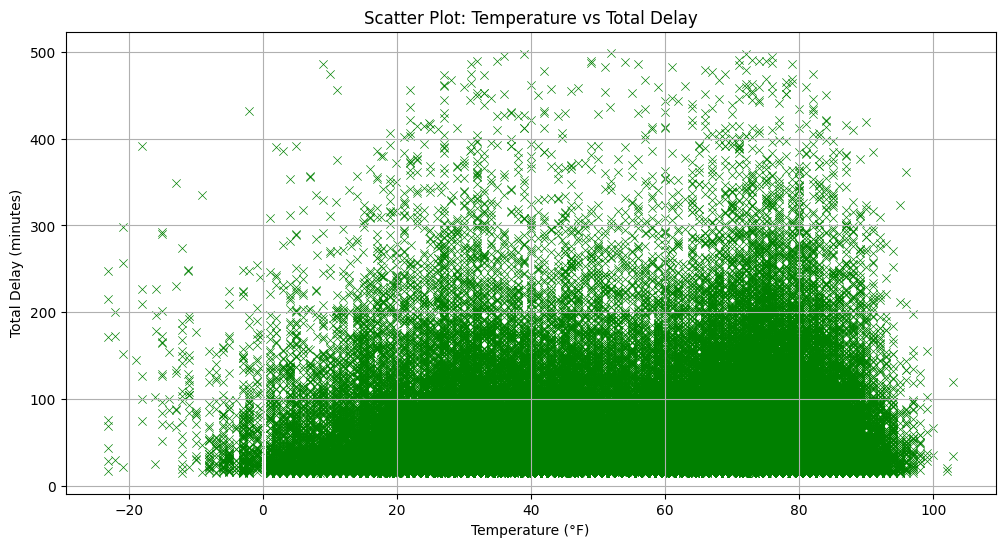

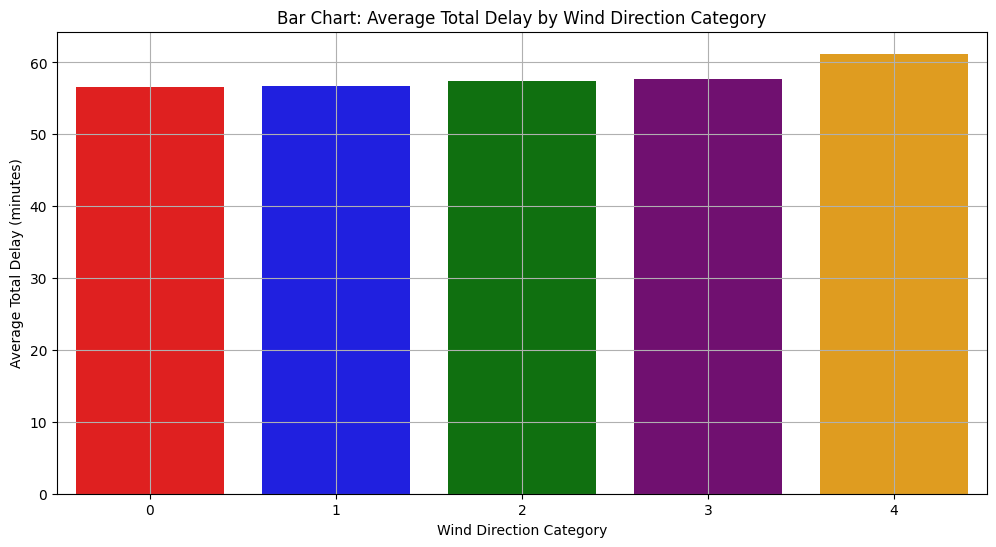

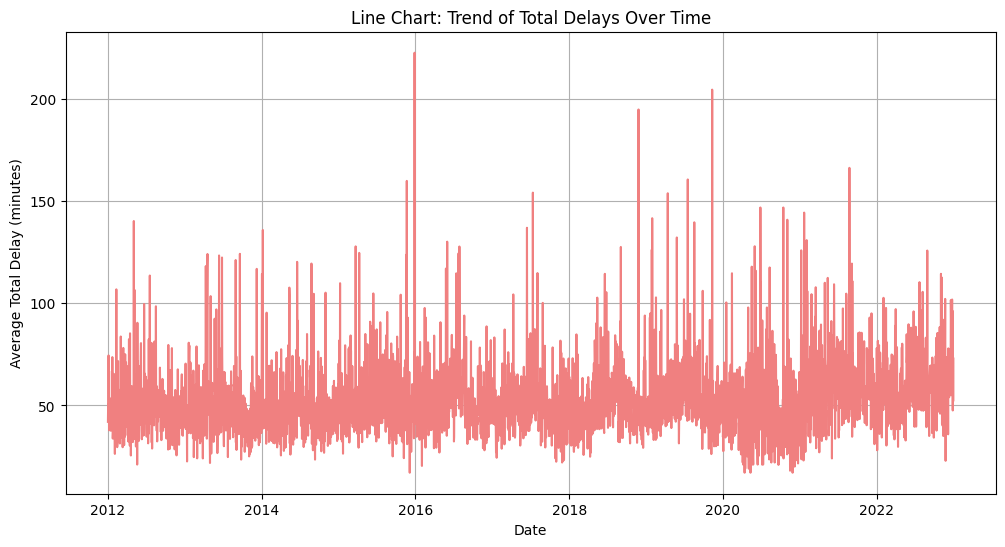

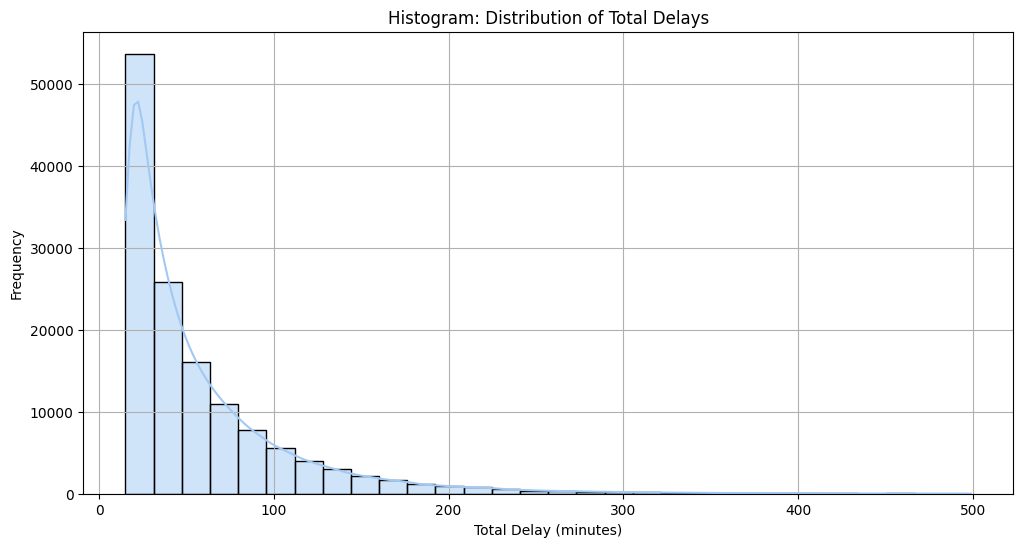

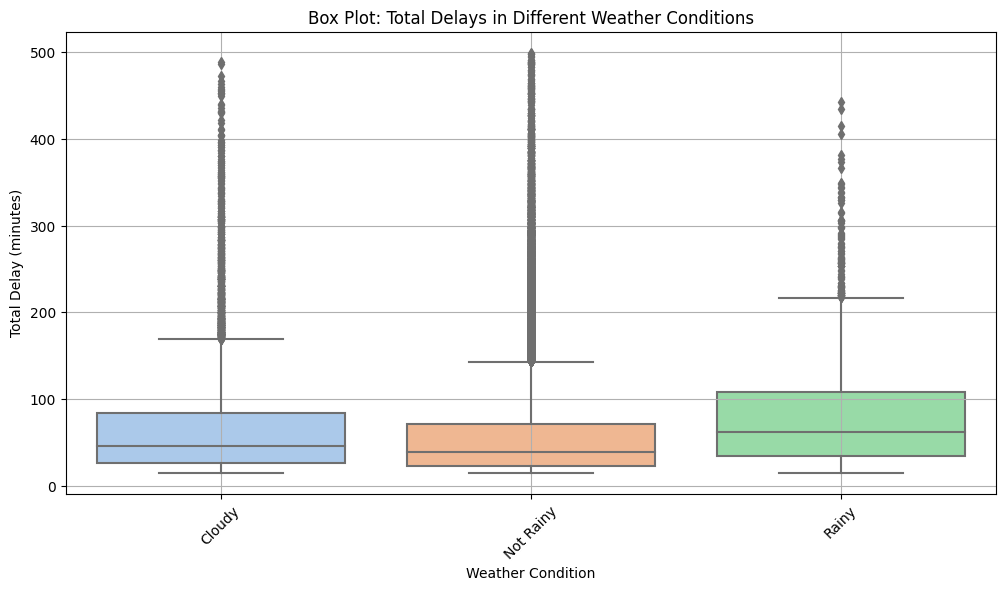

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert date columns to datetime for analysis
df['Date (MM/DD/YYYY)'] = pd.to_datetime(df['Date (MM/DD/YYYY)'])
df['Actual departure datetime'] = pd.to_datetime(df['Actual departure datetime'])
df['Scheduled departure datetime'] = pd.to_datetime(df['Scheduled departure datetime'])

# Calculate total delay in minutes
df['Total_Delay'] = df['total_delay']
 #(df['Actual departure datetime'] - df['Scheduled departure datetime']).dt.total_seconds() / 60

# Scatter Plot: Temperature vs Total Delay
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Temperature', y='Total_Delay',marker='x',color='green')
plt.title('Scatter Plot: Temperature vs Total Delay')
plt.xlabel('Temperature (°F)')
plt.ylabel('Total Delay (minutes)')
plt.grid(True)
plt.savefig('visualization1.png')
plt.show()

color_palette = sns.color_palette("viridis", 5)
custom_colors = ['red', 'blue', 'green', 'purple', 'orange']
# Bar Chart: Average Total Delay by Wind Direction Category
plt.figure(figsize=(12, 6))
df_wind_delay = df.groupby('windspeed_category')['Total_Delay'].mean().reset_index()
sns.barplot(data=df_wind_delay, x='windspeed_category', y='Total_Delay', palette=custom_colors)
plt.title('Bar Chart: Average Total Delay by Wind Direction Category')
plt.xlabel('Wind Direction Category')
plt.ylabel('Average Total Delay (minutes)')
plt.grid(True)
plt.savefig('visualization2.png')
plt.show()



# Line Chart: Trend of Total Delays over Time
# Choose a colormap (e.g., 'viridis')
cmap = plt.cm.viridis

# Normalize the data to map to the colormap
plt.figure(figsize=(12, 6))
line_color = 'lightcoral'
df_date_delay = df.groupby('Date (MM/DD/YYYY)')['Total_Delay'].mean().reset_index()
norm = plt.Normalize(df_date_delay['Total_Delay'].min(), df_date_delay['Total_Delay'].max())
sns.lineplot(data=df_date_delay, x='Date (MM/DD/YYYY)', y='Total_Delay',color=line_color)
plt.title('Line Chart: Trend of Total Delays Over Time')
plt.xlabel('Date')
plt.ylabel('Average Total Delay (minutes)')
plt.grid(True)
plt.savefig('visualization3.png')
plt.show()

# Histogram: Distribution of Total Delays
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")
sns.histplot(df['Total_Delay'], bins=30,kde=True)
plt.title('Histogram: Distribution of Total Delays')
plt.xlabel('Total Delay (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('visualization4.png')
plt.show()

# Box Plot: Total Delays in Different Weather Conditions
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Weather Condition', y='Total_Delay')
plt.title('Box Plot: Total Delays in Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Total Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('visualization5.png')
plt.show()

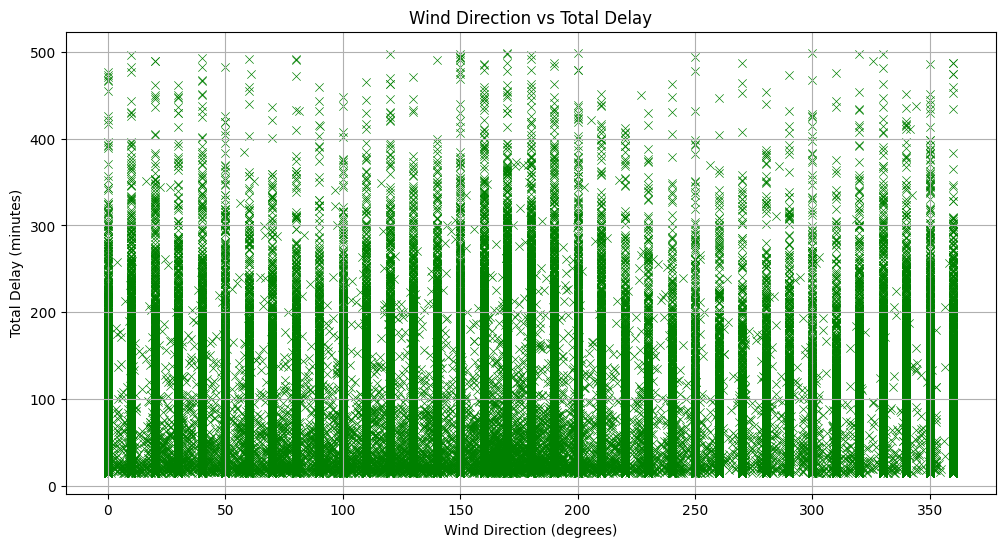

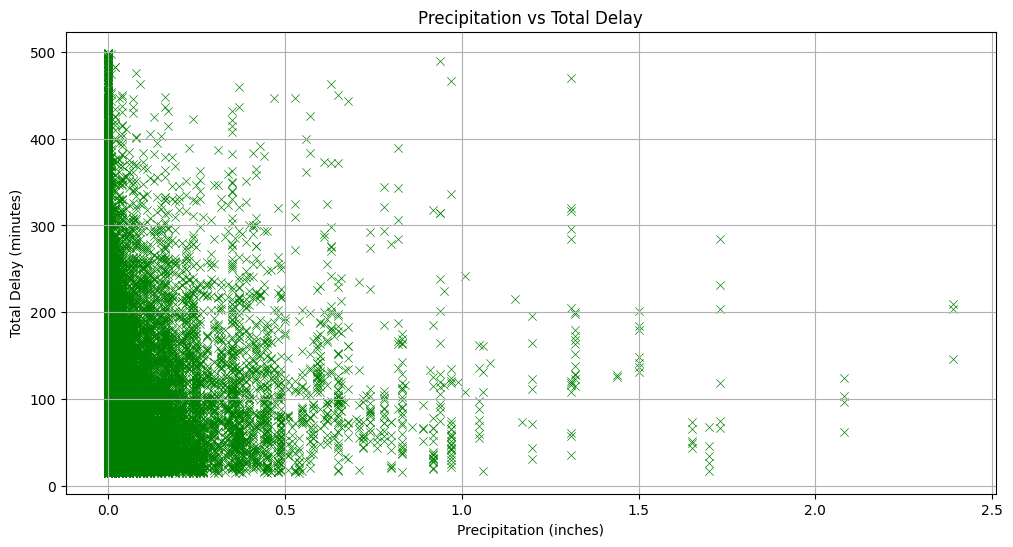

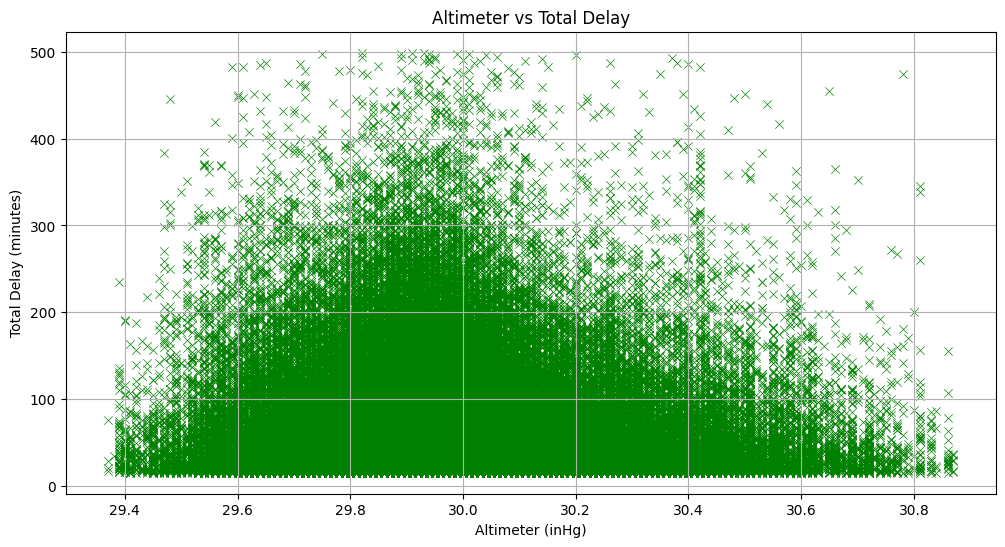

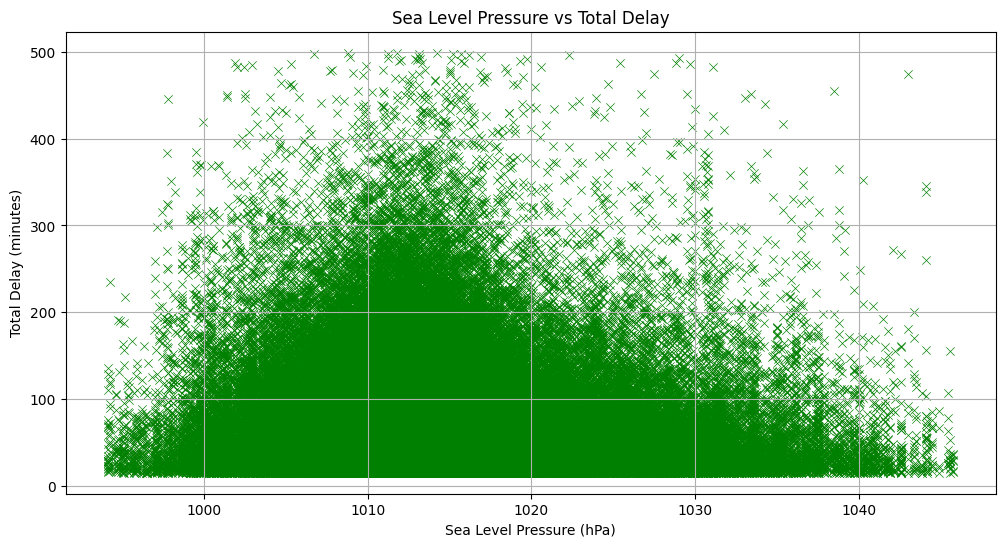

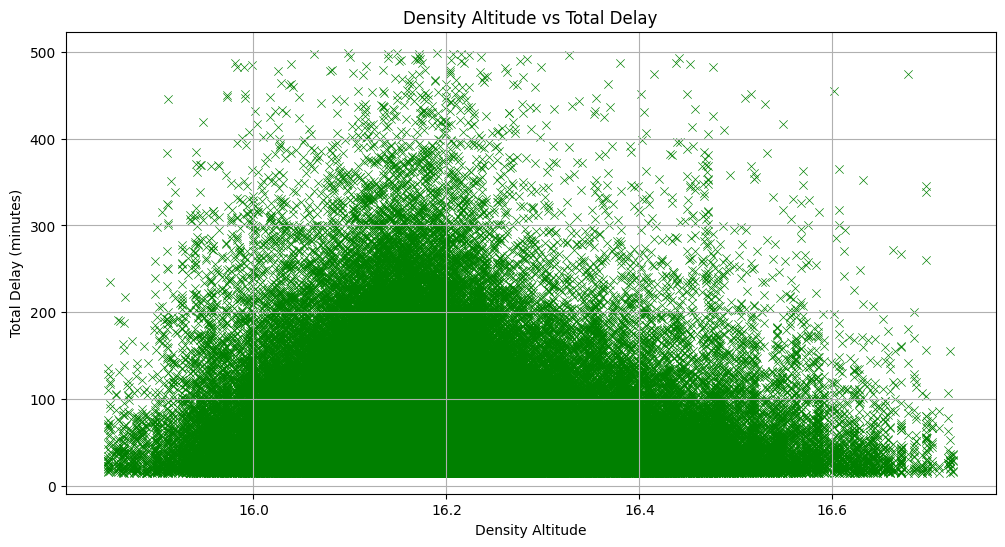

In [ ]:
# Creating additional charts to analyze the influence of various weather factors on total delay

# Wind Direction vs Total Delay
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Wind Direction', y='Total_Delay',marker='x',color='green')
plt.title('Wind Direction vs Total Delay')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Total Delay (minutes)')
plt.grid(True)
plt.savefig('visualization6.png')
plt.show()

# Precipitation vs Total Delay
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Precipitation', y='Total_Delay',marker='x',color='green')
plt.title('Precipitation vs Total Delay')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Total Delay (minutes)')
plt.grid(True)
plt.savefig('visualization7.png')
plt.show()

# Altimeter vs Total Delay
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Altimeter', y='Total_Delay',marker='x',color='green')
plt.title('Altimeter vs Total Delay')
plt.xlabel('Altimeter (inHg)')
plt.ylabel('Total Delay (minutes)')
plt.grid(True)
plt.savefig('visualization8.png')
plt.show()

# Sea Level Pressure vs Total Delay
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Sea Level Pressure', y='Total_Delay',marker='x',color='green')
plt.title('Sea Level Pressure vs Total Delay')
plt.xlabel('Sea Level Pressure (hPa)')
plt.ylabel('Total Delay (minutes)')
plt.grid(True)
plt.savefig('visualization9.png')
plt.show()

# Density Altitude vs Total Delay
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Density Altitude', y='Total_Delay',marker='x',color='green')
plt.title('Density Altitude vs Total Delay')
plt.xlabel('Density Altitude')
plt.ylabel('Total Delay (minutes)')
plt.grid(True)
plt.savefig('visualization10.png')
plt.show()

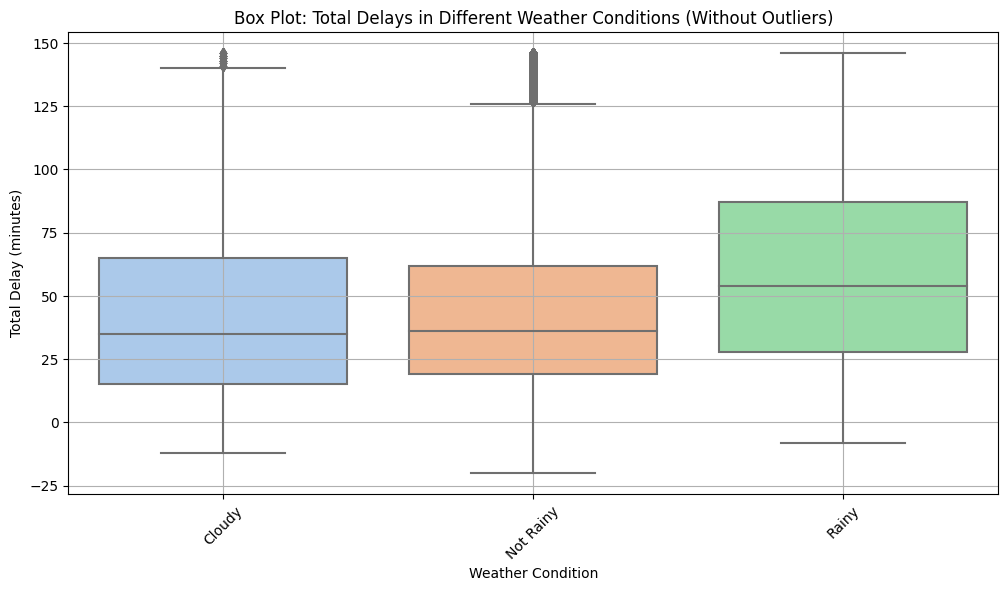

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-loading the dataset due to execution state reset
#file_path = '/mnt/data/dallas_cleaned.csv'
#df = pd.read_csv(file_path)

# Convert date columns to datetime and calculate total delay
df['Actual departure datetime'] = pd.to_datetime(df['Actual departure datetime'])
df['Scheduled departure datetime'] = pd.to_datetime(df['Scheduled departure datetime'])
df['Total_Delay'] = (df['Actual departure datetime'] - df['Scheduled departure datetime']).dt.total_seconds() / 60

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from the 'Total_Delay' column
df_clean = remove_outliers(df, 'Total_Delay')

# Box Plot: Total Delays in Different Weather Conditions (without outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Weather Condition', y='Total_Delay')
plt.title('Box Plot: Total Delays in Different Weather Conditions (Without Outliers)')
plt.xlabel('Weather Condition')
plt.ylabel('Total Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('visualization5.png')
plt.show()

# RUN TILL HERE

Apparent Humidity from difference of temparature and dew point,

In [ ]:
num_distinct_airports = df_cleaned2['Destination Airport'].nunique()
print(num_distinct_airports)

119


In [ ]:
# Assuming df_cleaned2 is your DataFrame and 'Destination Airport' is the categorical column
df_cleaned_one_hot = pd.get_dummies(df_cleaned4, columns=['Weather Condition','windspeed_category','relative_humidity_category','dew_point_category','absolute_humidity_category'])
#df_cleaned_one_hot = pd.get_dummies()

# Display the resulting DataFrame
print(df_cleaned_one_hot.head())

  Date (MM/DD/YYYY)  Destination Airport Actual departure datetime  \
4        2012-01-01            13.815559 2012-01-01 14:05:00+00:00   
5        2012-01-01            12.503986 2012-01-01 14:44:00+00:00   
6        2012-01-01            13.086152 2012-01-01 14:56:00+00:00   
7        2012-01-01            13.815559 2012-01-01 14:53:00+00:00   
8        2012-01-01            12.588574 2012-01-01 15:09:00+00:00   

  Scheduled departure datetime  Temperature  Wind Direction  Precipitation  \
4    2012-01-01 14:10:00+00:00         48.2             0.0       0.000004   
5    2012-01-01 14:45:00+00:00         47.0             0.0       0.000005   
6    2012-01-01 14:55:00+00:00         47.0             0.0       0.000005   
7    2012-01-01 15:00:00+00:00         47.0             0.0       0.000006   
8    2012-01-01 15:00:00+00:00         47.0             0.0       0.000007   

   Altimeter  Sea Level Pressure  Visibility  ...  dew_point_category_0  \
4      30.13             1020.45   

In [ ]:
df_cleaned_one_hot=df_cleaned_one_hot.drop(columns=['Date (MM/DD/YYYY)','Actual departure datetime','Scheduled departure datetime'])
df_cleaned_one_hot

,Destination Airport,Temperature,Wind Direction,Precipitation,Altimeter,Sea Level Pressure,Visibility,Apparent Temperature,LOF_Score,total_delay,...,dew_point_category_0,dew_point_category_1,dew_point_category_2,dew_point_category_3,dew_point_category_4,absolute_humidity_category_0,absolute_humidity_category_1,absolute_humidity_category_2,absolute_humidity_category_3,absolute_humidity_category_4
4,13.815559,48.2,0.0,0.000004,30.13,1020.45,0.25,48.20,1,0.0,...,0,0,1,0,0,0,0,0,1,0
5,12.503986,47.0,0.0,0.000005,30.15,1020.70,0.25,46.94,1,0.0,...,0,1,0,0,0,0,0,0,0,1
6,13.086152,47.0,0.0,0.000005,30.15,1020.70,0.25,46.94,1,0.0,...,0,1,0,0,0,0,0,0,0,1
7,13.815559,47.0,0.0,0.000006,30.15,1020.70,0.25,46.94,1,0.0,...,0,1,0,0,0,0,0,0,0,1
8,12.588574,47.0,0.0,0.000007,30.15,1020.70,0.25,46.94,1,0.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170299,13.447252,37.0,290.0,0.000000,29.98,1015.70,10.00,32.33,1,0.0,...,1,0,0,0,0,0,0,0,0,1
2170300,12.588574,37.0,290.0,0.000000,29.98,1015.70,10.00,32.33,1,43.0,...,1,0,0,0,0,0,0,0,0,1
2170301,14.062626,37.0,290.0,0.000000,29.98,1015.70,10.00,32.33,1,0.0,...,1,0,0,0,0,0,0,0,0,1
2170302,13.447252,37.0,290.0,0.000000,29.98,1015.70,10.00,32.33,1,0.0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
df_cleaned_one_hot.columns

Index(['Destination Airport', 'Temperature', 'Wind Direction', 'Precipitation',
       'Altimeter', 'Sea Level Pressure', 'Visibility', 'Apparent Temperature',
       'LOF_Score', 'total_delay', 'Apparent Humidity', 'Wind Chill',
       'Heat Index', 'Density Altitude', 'Air Density', 'Pressure Altitude',
       'Rolling_Avg_Delay', 'Rolling_Sum_Delay', 'Weather Condition_Cloudy',
       'Weather Condition_Not Rainy', 'Weather Condition_Rainy',
       'windspeed_category_0', 'windspeed_category_1', 'windspeed_category_2',
       'windspeed_category_3', 'windspeed_category_4',
       'relative_humidity_category_0', 'relative_humidity_category_1',
       'relative_humidity_category_2', 'relative_humidity_category_3',
       'relative_humidity_category_4', 'dew_point_category_0',
       'dew_point_category_1', 'dew_point_category_2', 'dew_point_category_3',
       'dew_point_category_4', 'absolute_humidity_category_0',
       'absolute_humidity_category_1', 'absolute_humidity_category_2',

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
# You can read your data into 'df' using pd.read_csv(), pd.read_excel(), or any other method

# Get data types of all columns
data_types = df_cleaned_one_hot.dtypes

# Print or display the data types
print(data_types)

Destination Airport             float64
Temperature                     float64
Wind Direction                  float64
Precipitation                   float64
Altimeter                       float64
Sea Level Pressure              float64
Visibility                      float64
Apparent Temperature            float64
LOF_Score                         int64
total_delay                     float64
Apparent Humidity               float64
Wind Chill                      float64
Heat Index                      float64
Density Altitude                float64
Air Density                     float64
Pressure Altitude               float64
Rolling_Avg_Delay               float64
Rolling_Sum_Delay               float64
Weather Condition_Cloudy          uint8
Weather Condition_Not Rainy       uint8
Weather Condition_Rainy           uint8
windspeed_category_0              uint8
windspeed_category_1              uint8
windspeed_category_2              uint8
windspeed_category_3              uint8


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming df_cleaned_one_hot is your one-hot encoded DataFrame
# Select only the numerical columns for normalization
selected_columns = list(set(df_cleaned_one_hot.columns) - {'total_delay'})
#numerical_columns = df_cleaned_one_hot.select_dtypes(include=['float64', 'int64']).columns

# Instantiate the StandardScaler
scaler = StandardScaler()

# Apply Z-score normalization to the numerical columns
df_cleaned_one_hot[selected_columns] = scaler.fit_transform(df_cleaned_one_hot[selected_columns])

# Display the resulting DataFrame
print(df_cleaned_one_hot.head())

   Destination Airport  Temperature  Wind Direction  Precipitation  Altimeter  \
4             0.196202    -0.867185       -1.776506      -0.103079   0.683360   
5            -0.476566    -0.929678       -1.776506      -0.103047   0.790674   
6            -0.177945    -0.929678       -1.776506      -0.103015   0.790674   
7             0.196202    -0.929678       -1.776506      -0.102983   0.790674   
8            -0.433177    -0.929678       -1.776506      -0.102951   0.790674   

   Sea Level Pressure  Visibility  Apparent Temperature  LOF_Score  \
4            0.731732    -4.89098             -0.692624   0.333422   
5            0.770044    -4.89098             -0.747824   0.333422   
6            0.770044    -4.89098             -0.747824   0.333422   
7            0.770044    -4.89098             -0.747824   0.333422   
8            0.770044    -4.89098             -0.747824   0.333422   

   total_delay  ...  dew_point_category_0  dew_point_category_1  \
4          0.0  ...      

In [ ]:
len(df_cleaned_one_hot)

2169867

In [ ]:
print(len(df_cleaned_one_hot.columns))

42


In [ ]:
df_cleaned_one_hot.corr()

,Destination Airport,Temperature,Dew Point,Relative Humidity,Wind Direction,Wind Speed,Precipitation,Altimeter,Sea Level Pressure,Visibility,...,Heat Index,Absolute Humidity,Density Altitude,Air Density,Pressure Altitude,Rolling_Avg_Delay,Rolling_Sum_Delay,Weather_Cloudy,Weather_Not Rainy,Weather_Rainy
Destination Airport,1.000000e+00,0.086521,0.054802,-0.059053,-0.015357,0.034512,0.001570,-0.012690,-0.022368,0.029758,...,0.003183,-0.099012,-0.022368,-0.080521,0.022373,0.037100,0.037100,-0.011201,0.010414,8.128586e-07
Temperature,8.652131e-02,1.000000,0.837447,-0.296906,-0.133705,0.018165,-0.028720,-0.396673,-0.456506,0.209309,...,0.074038,-0.930095,-0.456506,-0.991841,0.455337,0.055141,0.055141,-0.147286,0.140986,-1.065962e-02
Dew Point,5.480189e-02,0.837447,1.000000,0.256446,-0.149284,-0.045922,0.041757,-0.465571,-0.515026,0.000251,...,0.072418,-0.719080,-0.515026,-0.854264,0.513832,0.091921,0.091921,-0.026027,0.010203,3.685338e-02
Relative Humidity,-5.905323e-02,-0.296906,0.256446,1.000000,-0.038885,-0.135845,0.152684,-0.137825,-0.118021,-0.457479,...,-0.000155,0.377788,-0.118021,0.250501,0.117981,0.078089,0.078089,0.278304,-0.297342,1.016209e-01
Wind Direction,-1.535720e-02,-0.133705,-0.149284,-0.038885,1.000000,0.296080,-0.020372,-0.065226,-0.051181,0.055230,...,-0.023364,0.113063,-0.051181,0.125768,0.051397,-0.003121,-0.003121,-0.041298,0.044847,-1.698607e-02
Wind Speed,3.451157e-02,0.018165,-0.045922,-0.135845,0.296080,1.000000,0.019564,-0.210885,-0.208855,0.077710,...,-0.007145,-0.032573,-0.208855,-0.032738,0.209525,0.052532,0.052532,-0.028591,0.023038,9.332263e-03
Precipitation,1.570212e-03,-0.028720,0.041757,0.152684,-0.020372,0.019564,1.000000,-0.051112,-0.050106,-0.241173,...,0.001416,0.044185,-0.050106,0.018676,0.050226,0.154834,0.154834,0.183905,-0.386757,5.681799e-01
Altimeter,-1.268993e-02,-0.396673,-0.465571,-0.137825,-0.065226,-0.210885,-0.051112,1.000000,0.996425,0.069616,...,-0.040189,0.302765,0.996425,0.486385,-0.996497,-0.106610,-0.106610,-0.031421,0.044473,-4.018168e-02
Sea Level Pressure,-2.236834e-02,-0.456506,-0.515026,-0.118021,-0.051181,-0.208855,-0.050106,0.996425,1.000000,0.053732,...,-0.045821,0.359466,1.000000,0.543339,-0.999990,-0.107997,-0.107997,-0.021981,0.035494,-3.964821e-02
Visibility,2.975834e-02,0.209309,0.000251,-0.457479,0.055230,0.077710,-0.241173,0.069616,0.053732,1.000000,...,0.003067,-0.219365,0.053732,-0.185722,-0.053839,-0.105291,-0.105291,-0.743957,0.735088,-1.142836e-01


In [ ]:
df_cleaned_one_hot['total_delay']

4           0.0
5           0.0
6           0.0
7           0.0
8           0.0
           ... 
2170299     0.0
2170300    43.0
2170301     0.0
2170302     0.0
2170303     0.0
Name: total_delay, Length: 2169867, dtype: float64

In [ ]:
import pandas as pd
df_cleaned_one_hot=pd.read_csv('complete_final_data.csv')

In [ ]:
df_cleaned_one_hot.head()

,Destination Airport,Temperature,Wind Direction,Precipitation,Altimeter,Sea Level Pressure,Visibility,Apparent Temperature,LOF_Score,total_delay,...,dew_point_category_0,dew_point_category_1,dew_point_category_2,dew_point_category_3,dew_point_category_4,absolute_humidity_category_0,absolute_humidity_category_1,absolute_humidity_category_2,absolute_humidity_category_3,absolute_humidity_category_4
4,0.196202,-0.867185,-1.776506,-0.103079,0.683360,0.731732,-4.89098,-0.692624,0.333422,0.0,...,-0.515478,-0.496426,1.999244,-0.526014,-0.461373,-0.500062,-0.499963,-0.5,2.000090,-0.499998
5,-0.476566,-0.929678,-1.776506,-0.103047,0.790674,0.770044,-4.89098,-0.747824,0.333422,0.0,...,-0.515478,2.014398,-0.500189,-0.526014,-0.461373,-0.500062,-0.499963,-0.5,-0.499977,2.000010
6,-0.177945,-0.929678,-1.776506,-0.103015,0.790674,0.770044,-4.89098,-0.747824,0.333422,0.0,...,-0.515478,2.014398,-0.500189,-0.526014,-0.461373,-0.500062,-0.499963,-0.5,-0.499977,2.000010
7,0.196202,-0.929678,-1.776506,-0.102983,0.790674,0.770044,-4.89098,-0.747824,0.333422,0.0,...,-0.515478,2.014398,-0.500189,-0.526014,-0.461373,-0.500062,-0.499963,-0.5,-0.499977,2.000010
8,-0.433177,-0.929678,-1.776506,-0.102951,0.790674,0.770044,-4.89098,-0.747824,0.333422,0.0,...,-0.515478,2.014398,-0.500189,-0.526014,-0.461373,-0.500062,-0.499963,-0.5,-0.499977,2.000010


In [ ]:
df_cleaned_one_hot=df_cleaned_one_hot.reset_index()

In [ ]:
new_df = df_cleaned_one_hot.iloc[:, 1:43].copy()

In [ ]:
new_df.head()

,Destination Airport,Temperature,Wind Direction,Precipitation,Altimeter,Sea Level Pressure,Visibility,Apparent Temperature,LOF_Score,total_delay,...,dew_point_category_0,dew_point_category_1,dew_point_category_2,dew_point_category_3,dew_point_category_4,absolute_humidity_category_0,absolute_humidity_category_1,absolute_humidity_category_2,absolute_humidity_category_3,absolute_humidity_category_4
0,0.196202,-0.867185,-1.776506,-0.103079,0.683360,0.731732,-4.89098,-0.692624,0.333422,0.0,...,-0.515478,-0.496426,1.999244,-0.526014,-0.461373,-0.500062,-0.499963,-0.5,2.000090,-0.499998
1,-0.476566,-0.929678,-1.776506,-0.103047,0.790674,0.770044,-4.89098,-0.747824,0.333422,0.0,...,-0.515478,2.014398,-0.500189,-0.526014,-0.461373,-0.500062,-0.499963,-0.5,-0.499977,2.000010
2,-0.177945,-0.929678,-1.776506,-0.103015,0.790674,0.770044,-4.89098,-0.747824,0.333422,0.0,...,-0.515478,2.014398,-0.500189,-0.526014,-0.461373,-0.500062,-0.499963,-0.5,-0.499977,2.000010
3,0.196202,-0.929678,-1.776506,-0.102983,0.790674,0.770044,-4.89098,-0.747824,0.333422,0.0,...,-0.515478,2.014398,-0.500189,-0.526014,-0.461373,-0.500062,-0.499963,-0.5,-0.499977,2.000010
4,-0.433177,-0.929678,-1.776506,-0.102951,0.790674,0.770044,-4.89098,-0.747824,0.333422,0.0,...,-0.515478,2.014398,-0.500189,-0.526014,-0.461373,-0.500062,-0.499963,-0.5,-0.499977,2.000010


In [ ]:
new_df.columns

Index(['Destination Airport', 'Temperature', 'Wind Direction', 'Precipitation',
       'Altimeter', 'Sea Level Pressure', 'Visibility', 'Apparent Temperature',
       'LOF_Score', 'total_delay', 'Apparent Humidity', 'Wind Chill',
       'Heat Index', 'Density Altitude', 'Air Density', 'Pressure Altitude',
       'Rolling_Avg_Delay', 'Rolling_Sum_Delay', 'Weather Condition_Cloudy',
       'Weather Condition_Not Rainy', 'Weather Condition_Rainy',
       'windspeed_category_0', 'windspeed_category_1', 'windspeed_category_2',
       'windspeed_category_3', 'windspeed_category_4',
       'relative_humidity_category_0', 'relative_humidity_category_1',
       'relative_humidity_category_2', 'relative_humidity_category_3',
       'relative_humidity_category_4', 'dew_point_category_0',
       'dew_point_category_1', 'dew_point_category_2', 'dew_point_category_3',
       'dew_point_category_4', 'absolute_humidity_category_0',
       'absolute_humidity_category_1', 'absolute_humidity_category_2',

In [ ]:
new_df=new_df.drop(columns=['Wind Direction','Altimeter','Sea Level Pressure','Visibility','Apparent Temperature','LOF_Score','Apparent Humidity','Wind Chill','Heat Index','Density Altitude','Air Density','Pressure Altitude'])

In [ ]:
new_df.to_csv('complete_final_data.csv')

In [ ]:
df_cleaned_one_hot=new_df

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X_train and y_train are your training data
# Define feature names based on your dataframe
# Separate features (X) and target variable (y)
X = df_cleaned_one_hot.drop('total_delay', axis=1).values
y = df_cleaned_one_hot['total_delay'].values
#feature_names = list(df_cleaned_one_hot.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix with explicit feature names
feature_names = list(df_cleaned_one_hot.drop('total_delay', axis=1).columns)
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names)

# Define and train the XGBoost model
xg_reg = xgb.train(params={'objective':'reg:squarederror', 'colsample_bytree':0.3, 'learning_rate':0.25,
                           'max_depth':7, 'alpha':10, 'n_estimators':10}, dtrain=dtrain)
#xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.25,
               # max_depth = 7, alpha = 10, n_estimators = 10, random_state=42)

# Extract feature importance
importance_dict = xg_reg.get_score(importance_type='weight')

# Visualize feature importance
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
features, importance = zip(*sorted_importance)

plt.figure(figsize=(10,6))
plt.bar(features, importance)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importance')
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:18:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
feature_names

['Destination Airport',
 'Temperature',
 'Dew Point',
 'Relative Humidity',
 'Wind Direction',
 'Wind Speed',
 'Precipitation',
 'Altimeter',
 'Sea Level Pressure',
 'Visibility',
 'Apparent Temperature',
 'LOF_Score',
 'Apparent Humidity',
 'Wind Chill',
 'Heat Index',
 'Absolute Humidity',
 'Density Altitude',
 'Air Density',
 'Pressure Altitude',
 'Rolling_Avg_Delay',
 'Rolling_Sum_Delay',
 'Weather_Cloudy',
 'Weather_Not Rainy',
 'Weather_Rainy']

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score,make_scorer
import numpy as np

# Assuming df_cleaned_one_hot is your DataFrame with features and 'total_delay' as the target variable
# Adjust the features and target variable based on your specific DataFrame

# Separate features (X) and target variable (y)
X = df_cleaned_one_hot.drop('total_delay', axis=1).values
y = df_cleaned_one_hot['total_delay'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate XGBoost regressor
xg_reg = xgb.XGBRegressor(learning_rate = 0.1, n_estimators = 1000, max_depth = 5, min_child_weight = 1, gamma = 0, subsample = 0.8, colsample_bytree = 0.9, objective='reg:squarederror', seed=27)

# Cross-validation with mean squared error and R-squared as scoring metrics
mse_scorer = make_scorer(mean_squared_error)
r2_scorer = make_scorer(r2_score)

mse_scores = cross_val_score(xg_reg, X_train, y_train, cv=5, scoring=mse_scorer)
r2_scores = cross_val_score(xg_reg, X_train, y_train, cv=5, scoring=r2_scorer)

# Train the model on the full training set
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_reg.predict(X_test)

importance_dict = xg_reg.get_booster().get_score(importance_type='weight')

# Visualize feature importance
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
features, importance = zip(*sorted_importance)

# Calculate mean squared error on the test set
mse_test = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse_test)

# Calculate R-squared on the test set
r2_test = r2_score(y_test, y_pred)

# Print mean squared error scores from cross-validation
print("Cross-Validation Mean Squared Error Scores:")
print(mse_scores)

#earning_rate = 0.1, n_estimators = 1000, max_depth = 5, min_child_weight = 1, gamma = 0, subsample = 0.8, colsample_bytree = 0.9, objective=’binary:logistic’, seed=27

# Print R-squared scores from cross-validation
print("\nCross-Validation R-squared Scores:")
print(r2_scores)

# Print mean squared error on the test set
print("\nMean Squared Error on Test Set:")
print(mse_test)

print("\nRoot mean squared error on Test set:")
print(rmse)

# Print R-squared on the test set
print("\nR-squared on Test Set:")
print(r2_test)

Cross-Validation Mean Squared Error Scores:
[1223.41319281 1230.16921369 1281.01960762 1224.04189406 1203.42531549]

Cross-Validation R-squared Scores:
[0.27499683 0.27327577 0.26786899 0.25912153 0.27287196]

Mean Squared Error on Test Set:
1218.540275652979

Root mean squared error on Test set:
34.90759624570244

R-squared on Test Set:
0.2847240520841836


In [ ]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Extract features and target variable
X = df_cleaned_one_hot.drop('total_delay', axis=1).values
y = df_cleaned_one_hot['total_delay'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Define parameters for LightGBM
params = {
    'objective': 'regression',  # 'regression' for regression problems
    'metric': 'mse',  # Mean Squared Error
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,  # Number of leaves in each tree
    'learning_rate': 0.05,  # Learning rate
    'feature_fraction': 0.9,  # Feature fraction
    'bagging_fraction': 0.8,  # Bagging fraction
    'bagging_freq': 5,  # Bagging frequency
    'verbose': 0  # Controls the level of LightGBM's verbosity
}

# Train the LightGBM model
num_round = 1000  # Number of boosting rounds
bst = lgb.train(params, train_data, num_round)+

# Make predictions on the test set
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# Cross-validation
#cv_results = cross_val_score(bst, X, y, cv=5, scoring='neg_mean_squared_error')
#cv_mse_mean = -cv_results.mean()
#print(f'Cross-Validated Mean Squared Error: {cv_mse_mean}')

Mean Squared Error on Test Set: 1253.691288471305


TypeError: ignored

In [ ]:
print(sorted_importance)

[('f0', 44.0), ('f21', 43.0), ('f20', 40.0), ('f1', 30.0), ('f9', 17.0), ('f11', 16.0), ('f17', 16.0), ('f15', 13.0), ('f6', 11.0), ('f2', 10.0), ('f4', 10.0), ('f19', 9.0), ('f13', 8.0), ('f18', 8.0), ('f8', 7.0), ('f14', 7.0), ('f3', 6.0), ('f10', 4.0), ('f16', 4.0), ('f23', 3.0), ('f24', 3.0)]


In [ ]:
len(df_cleaned_one_hot.columns)

26

In [ ]:
selected_features = [feature for feature, importance in importance_dict.items() if importance > 10.0]

# Select only the relevant columns from your original DataFrame
X_selected = df_cleaned_one_hot[selected_features].values
y=df_cleaned_one_hot['total_delay'].values

X_train_selected, X_test_selected, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train a new XGBoost model using only selected features
xg_reg_selected = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.3,
                                    max_depth=8, alpha=10, n_estimators=10)
xg_reg_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the model with selected features
#X_test_selected = X_test[selected_features]
y_pred_selected = xg_reg_selected.predict(X_test_selected)

# Evaluate the model with selected features
mse_selected = mean_squared_error(y_test, y_pred_selected)
print(f'Mean Squared Error with selected features: {mse_selected}')

Mean Squared Error with selected features: 0.7489288217674356


In [ ]:
df_cleaned_one_hot.to_csv('Complete_clean_data_total_delay_unormalised.csv')

Average and standard deviation of historical delays for a particular flight route
thi can be calculated by destination airport previously where group by the destination airport and find the average and standard deviation

steps to be done in cleaning, handling missing values, data type conversions, data normalization, and outlier detection, missing value imputation, and error correction.They also mention that they used machine learning techniques to identify and remove outliers.conducted correlation analysis and removed irrelevant or redundant features.

In [ ]:
import pandas as pd
import numpy as np

# Assuming your dataframe is named df and the columns are 'precipitation', 'windspeed', and 'relative_humidity'
# Replace these column names with the actual names in your dataframe

# Define the number of categories
num_categories = 5  # Adjust this number based on your preference

# Function to create categories with almost equal records
def create_equal_categories(column_values, num_categories):
    # Use the qcut function to create categories with almost equal records
    categories = pd.qcut(column_values, q=num_categories, labels=False, precision=0)
    return categories

# Apply the function to each column
df['precipitation_category'] = create_equal_categories(df['precipitation'], num_categories)
df['windspeed_category'] = create_equal_categories(df['windspeed'], num_categories)
df['relative_humidity_category'] = create_equal_categories(df['relative_humidity'], num_categories)

# Now, your dataframe has new columns with categories based on equal records